# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US.

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this [link](https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/EhWeqeQsh-9Mr1fneZc9_0sBOBzEdXngvxFJtAlIa-eAgA?e=8ukWwa). Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following [link](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ).

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents.


### 1. Determine if and why ML is an appropriate solution to deploy.

In [2]:
# 2.8 not finished yet
# 2.15 not finished yet


# 1. Determine if and why ML is an appropriate solution to deploy.

# Machine Learning (ML) is an appropriate solution for this business scenario because flight delays are caused by multiple complex and interrelated factors such as weather conditions, time of day, airport congestion, and airline operations. These relationships are non-linear and cannot be accurately captured by traditional rule-based or statistical methods. By using ML, we can train a predictive model on large volumes of historical flight data to automatically learn the patterns that lead to delays. The model can then predict future delays in real-time, improving decision-making and customer experience.

#Justification for ML:
  # The dataset is large and labeled, suitable for supervised learning.
  # Patterns are dynamic and require adaptive algorithms to update over time.
  # Predictive outcomes directly support business decision-making.
  # Reduces manual analysis time and increases accuracy in delay prediction


### 2. Formulate the business problem, success metrics, and desired ML output.

In [3]:
# Write your answer here and turn the cell type into markdown
# 2. Formulate the business problem, success metrics, and desired ML output.

# Business Problem:
 # A travel booking website wants to alert customers at the time of booking if their flight is likely to be delayed due to weather or operational factors.

# Business Goal:
 # Develop a machine learning model to predict the likelihood of a flight delay (> 15 minutes). This enables proactive communication to customers and optimization of airline scheduling.

# Success Metrics:
  # Accuracy ≥ 85 %
  # Precision ≥ 80 % and Recall ≥ 80 %** (balance false positives/negatives)
  # ROC-AUC ≥ 0.90 to ensure good model discrimination
  # Reduction in customer complaints and missed connections.

# Desired ML Output:
 # Binary classification variable:
  # `1` = Flight delayed by more than 15 minutes
  # `0` = Flight on time or ≤ 15 minutes late

# This output will be integrated into the booking interface to flag “high-risk” flights.


### 3. Identify the type of ML problem you’re dealing with.

In [4]:
# Write your answer here and turn the cell type into markdown
### 3. Identify the type of ML problem you’re dealing with.

# This is a Supervised Binary Classification problem.

  # Inputs (features):**
 # Year, Month, DayOfWeek, Airline, Origin, Destination, Departure time, Distance, etc.

# Output (target):
# `is_delay` — 1 if the flight arrival delay > 15 minutes, otherwise 0.

# Learning Task:
 # Train a model to predict `is_delay` from the provided features.
 # Suitable algorithms include Logistic Regression, Random Forest, or XGBoost.

# Reasoning:
# Because the target variable takes only two values (delay / no-delay), the problem naturally maps to a binary classification task using supervised learning techniques.


### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [5]:

# Correct import for notebooks (Python 3+)
%pip install pathlib2
from pathlib import Path
import os
from zipfile import ZipFile
import time
from pathlib2 import Path

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>
# -*- coding: utf-8 -*-
# -------------------------------------------------------------
# STEP 1: SETUP ENVIRONMENT
# -------------------------------------------------------------
# This code imports all necessary libraries for data handling,
# visualization, and system operations. Each library serves a
# specific purpose in the data analysis and ML pipeline.
# -------------------------------------------------------------

# 1 System and file handling modules
import os                     # For directory and file path operations
from pathlib2 import Path      # Provides an object-oriented interface for filesystem paths
from zipfile import ZipFile    # To read and extract multiple compressed (.zip) data files
import time                    # Used for measuring execution time during long processes

# 2 Data processing and numerical computation
import pandas as pd            # For reading, cleaning, and manipulating tabular data
import numpy as np             # For numerical operations and array handling
import subprocess               # (Optional) Used if you need to automate shell commands like 'ls' or 'mkdir'

# 3 Data visualization and exploration
import matplotlib.pyplot as plt # For plotting graphs (line, scatter, bar, etc.)
import seaborn as sns           # For advanced statistical visualizations (heatmaps, distributions, etc.)

# Set a consistent visual style for all plots
sns.set(style="whitegrid")

# 4 Handle warnings for a cleaner notebook output
import warnings
warnings.filterwarnings('ignore')

# 5 Ensure inline plotting for Jupyter and Colab environments
# %matplotlib inline  # (Uncomment if running locally in Jupyter)

# Print confirmation message for setup success
print(" Environment successfully initialized. Libraries imported and ready for data processing.")


# Explanation of setup:
 # `os`, `Path`, and `ZipFile` help manage files and extract data archives.
 # `pandas` and `numpy` handle data structures and numerical analysis.
 # `matplotlib` and `seaborn` visualize trends and patterns.
 # `warnings.filterwarnings('ignore')` hides unnecessary runtime messages.
 # This setup ensures a clean, reproducible workspace to handle large flight datasets across multiple ZIP files.



Note: you may need to restart the kernel to use updated packages.
 Environment successfully initialized. Libraries imported and ready for data processing.


In [6]:
%pip install pathlib2

Note: you may need to restart the kernel to use updated packages.


### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features?

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [33]:
# Step 2: Data preprocessing and visualization
# ------------------------------------------------------------
# This phase prepares the project environment, sets up directories,
# and counts the available ZIP files for processing.
# ------------------------------------------------------------

# Import required libraries
import os
from pathlib import Path

# Step 2.1: Create directories and prepare to extract data
# ------------------------------------------------------------
# The following setup uses relative paths so the notebook
# can run on any machine (local or cloud) without modification.
# ------------------------------------------------------------

# Define folder paths for project organization
base_path = Path("/Users/yuotmalual/Desktop/finalassignment_DSTS")              # Root directory for the project
zip_path = base_path / "finalassignment_DSTS" # Folder containing the monthly ZIP files
csv_base_path = base_path / "extracted" # Folder for extracted CSV files

# Create the folders if they do not exist
os.makedirs(zip_path, exist_ok=True)
os.makedirs(csv_base_path, exist_ok=True)

print(f"Directory ready for ZIP files: {zip_path}")
print(f"Directory ready for extracted CSVs: {csv_base_path}")


Directory ready for ZIP files: /Users/yuotmalual/Desktop/finalassignment_DSTS/finalassignment_DSTS
Directory ready for extracted CSVs: /Users/yuotmalual/Desktop/finalassignment_DSTS/extracted


In [34]:
import os
print(os.getcwd())  # Should show /Users/yuotmalual/Desktop/finalassignment_DSTS
print(os.listdir())  # Should list your ZIP files


/Users/yuotmalual/Desktop/finalassignment_DSTS
['finalassignment_DSTS', 'extracted_data', 'daily-summaries-2025-10-18T11-56-23.csv', 'onpremises_FirstPart.ipynb', 'cleaned_flight_data.csv', 'Figure_2.png', 'combined_csv_v1.csv', '.DS_Store', 'Final_Project_Data_Science_Pipeline.pdf', 'Part_A.py', 'Figure_1.png', 'requirements.txt', 'combined_csv_v2.csv', 'OneDrive_1_15-10-2025', 'final project report', 'Presentation-Part-C.pptx', 'daily-summaries-2025-10-20T04-59-29.csv', 'OneDrive_1_15-10-2025 2', 'Assignment2DSTS.py', 'filtered_arrival_delay.csv', 'onpremises.ipynb', 'Part-B.py', 'onpremises.py', 'onpremises(1).ipynb', 'datasciencetechnology', '.ipynb_checkpoints', '.combined_files.csv', 'oncloud.ipynb', 'Part C – Presentation and Q&A Guide.docx', 'combined_files.csv', 'onpremises(1)(2).ipynb', 'Flight Delay prediction Dashboard-Yuot Deng Malual.twb', 'data', 'filtered_flights.csv', 'Flight Delay prediction Dashboard.twb', '#Tableau Dashboard Link:.py', 'extracted', 'Another_copy_of_

In [35]:
# Step 2.2: Count ZIP files
# ------------------------------------------------------------
from pathlib import Path
from zipfile import ZipFile
import os

# Set base and extraction paths
base_path = Path(".")                      # current working directory
csv_base_path = base_path / "extracted"    # folder for extracted data
csv_base_path.mkdir(exist_ok=True)

# Find all ZIP files
zip_files = list(base_path.glob("*.zip"))
print(f"Total ZIP files found: {len(zip_files)}")

# Extract each one into its own folder
for zip_file in zip_files:
    extract_folder = csv_base_path / zip_file.stem
    extract_folder.mkdir(exist_ok=True)
    print(f"Extracting {zip_file.name} to {extract_folder}")
    with ZipFile(zip_file, 'r') as zf:
        zf.extractall(extract_folder)

print("All ZIP files extracted successfully.")



Total ZIP files found: 1
Extracting OneDrive_1_15-10-2025.zip to extracted/OneDrive_1_15-10-2025
All ZIP files extracted successfully.


#### Extract CSV files from ZIP files

In [10]:
# step 2.3: Extract CSV files from ZIP files
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z:
            print(f'Extracting {zipFile_name} ')
            z.extractall(path=file_path)
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting OneDrive_1_15-10-2025.zip 
Files Extracted


In [11]:
# How many csv files have we extracted? write a code to answer it.
# ------------------------------------------------------------
# STEP 2.41: Count extracted CSVs
# ------------------------------------------------------------
# Verify extraction completeness and inspect a few filenames.
# ------------------------------------------------------------

# List all extracted CSVs
csv_files = [os.path.join(csv_base_path, f) for f in os.listdir(csv_base_path) if f.endswith('.csv')]
import glob

csv_files = glob.glob("extracted/**/*.csv", recursive=True)
print(f"Total CSV files found: {len(csv_files)}")
csv_files[:5]

# After extraction, we verify the number of CSV files to ensure completeness.
# Each ZIP file should yield one CSV (so 60 ZIPs → 60 CSVs).



Total CSV files found: 60


['extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv',
 'extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_11/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_11.csv',
 'extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_10/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_10.csv',
 'extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_8/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_8.csv',
 'extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5.csv']

Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [12]:
# step 2.42 
from IPython.display import IFrame
import os
import glob

# Search recursively for any readme.html inside the extracted folder
readme_files = glob.glob("extracted/**/readme.html", recursive=True)

print(f"Found {len(readme_files)} readme.html file(s).")
for f in readme_files:
    print(" -", f)


# Build the full relative path to your HTML file
html_path = os.path.join(csv_base_path, "readme.html")

# Verify that the file exists before displaying
if os.path.exists(html_path):
    IFrame(src=os.path.relpath(html_path), width=1000, height=600)
else:
    print(f"File not found: {html_path}")


Found 60 readme.html file(s).
 - extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12/readme.html
 - extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_11/readme.html
 - extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_10/readme.html
 - extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_8/readme.html
 - extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5/readme.html
 - extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2/readme.html
 - extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_6/readme.html
 - extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_1/readme.html
 - extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On

In [13]:
# Step 2.43
from IPython.display import IFrame
import os

# Define the path to one of your readme.html files
html_path = "extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_11/readme.html"

# Confirm that the file exists
if not os.path.exists(html_path):
    raise FileNotFoundError(f"File not found: {html_path}")

# The IFrame call must be the *last statement* in the cell
IFrame(src=os.path.relpath(html_path), width=1000, height=600)



In [14]:
### Load sample CSV

# Before merging all months, we load a single CSV file to inspect its structure, column names, and data types. This helps us understand what kind of preprocessing will be needed.


#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [15]:
# ------------------------------------------------------------
# Load and preview one CSV file
# ------------------------------------------------------------
# Pandas is used for reading and exploring a sample file.
# Only the first 10,000 rows are read for inspection to avoid
# high memory usage when working with large datasets.
# ------------------------------------------------------------
import pandas as pd

# Select one file for preview
sample_file = csv_files[0]
print(f"Reading sample file: {sample_file}")

# Load a manageable number of rows
df = pd.read_csv(sample_file, nrows=10000)
print(f"Sample data shape: {df.shape}")

# Display the first few rows of the dataframe
df.head()


Reading sample file: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv
Sample data shape: (10000, 110)


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2014,4,12,1,1,2014-12-01,AA,19805,AA,N790AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,4,12,2,2,2014-12-02,AA,19805,AA,N787AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,4,12,3,3,2014-12-03,AA,19805,AA,N794AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,4,12,4,4,2014-12-04,AA,19805,AA,N784AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,4,12,5,5,2014-12-05,AA,19805,AA,N798AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print the row and column length in the dataset, and print the column names.

In [16]:
import os

# Folder where you expect the CSV to be
target_folder = "extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_11"

# List all files there
if os.path.exists(target_folder):
    print("Files inside the folder:\n")
    for f in os.listdir(target_folder):
        print(f)
else:
    print("Folder not found:", target_folder)


Files inside the folder:

On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_11.csv
readme.html


**Question**: Print the first 10 rows of the dataset.  

In [17]:
# 2.5: Preview the first 10 rows
from pathlib import Path
import pandas as pd
# Find all CSV files that include "2018_11" in the name
matches = list(Path("extracted").rglob("*2018_11*.csv*"))
print(f"Total matching CSV files found: {len(matches)}")
for m in matches:
    print(m)


# Automatically find the real file
matches = list(Path("extracted").rglob("*2018_11*.csv*"))
print(f"Total matches: {len(matches)}")
for m in matches:
    print("Found:", m)

# Pick the first matching file (your 2018_11 CSV)
sample_csv = matches[0]
print(f"\nLoading file: {sample_csv}")

# Read first 10,000 rows for preview (safe for large data)
df_temp = pd.read_csv(sample_csv, nrows=10000, low_memory=False)

# Display shape and first 10 rows
print(f"\nRows and columns in the sample: {df_temp.shape}\n")
df_temp.head(10)


Total matching CSV files found: 1
extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_11/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_11.csv
Total matches: 1
Found: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_11/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_11.csv

Loading file: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_11/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_11.csv

Rows and columns in the sample: (10000, 110)



,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,4,11,30,5,2018-11-30,9E,20363,9E,N8783E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,4,11,27,2,2018-11-27,9E,20363,9E,N8836A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,4,11,28,3,2018-11-28,9E,20363,9E,N8836A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,4,11,29,4,2018-11-29,9E,20363,9E,N8836A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,4,11,30,5,2018-11-30,9E,20363,9E,N8783E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,4,11,1,4,2018-11-01,9E,20363,9E,N8943A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,4,11,2,5,2018-11-02,9E,20363,9E,N8970D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,4,11,4,7,2018-11-04,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,4,11,5,1,2018-11-05,9E,20363,9E,N134EV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,4,11,7,3,2018-11-07,9E,20363,9E,N303PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [18]:
# ------------------------------------------------------------
# STEP 2.6: Display all column names for the dataset
# ------------------------------------------------------------
print("The column names are:\n---------------------")
for col in df_temp.columns:
    print(col)


The column names are:
---------------------
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1Wh

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not.

For example: `5 in [1,2,3,4,5]`

In [19]:
# ------------------------------------------------------------
# STEP 2.7: Filter columns containing the word "Del"
# ------------------------------------------------------------
delay_cols = [col for col in df_temp.columns if 'Del' in col]
print("Columns containing 'Del':")
print(delay_cols)


Columns containing 'Del':
['DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DivArrDelay']


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [20]:
print(df_temp.columns.tolist())
# ------------------------------------------------------------
# ------------------------------------------------------------
# STEP 2.8: Answer dataset summary questions
# ------------------------------------------------------------
# This cell uses the loaded DataFrame (df_temp) to explore the data
# and answer the basic structural questions.
# ------------------------------------------------------------

# 1. Number of rows and columns
print("The #rows and #columns are", df_temp.shape[0], "and", df_temp.shape[1])

# 2. Years included
print("The years in this dataset are:", sorted(df_temp['Year'].unique()))

# 3. Months covered
print("The months covered in this dataset are:", sorted(df_temp['Month'].unique()))

# 4. Date range (from first to last flight date)
print("The date range for data is:", df_temp['FlightDate'].min(), "to", df_temp['FlightDate'].max())

# 5. Airlines included
print("The airlines covered in this dataset are:", list(df_temp['Reporting_Airline'].unique()))

# 6. Origin airports
print("The Origin airports covered are:", list(df_temp['Origin'].unique()[:10]))

# 7. Destination airports
print("The Destination airports covered are:", list(df_temp['Dest'].unique()[:10]))


['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline', 'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk', 'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FirstDepTime', 'TotalAddGTime'

In [21]:
# ------------------------------------------------------------
# STEP 2.9: Count origin and destination airport frequencies
# ------------------------------------------------------------
# This step calculates how often each airport appears as an
# origin or destination in the dataset. This helps identify
# the busiest routes and airports.
# ------------------------------------------------------------

import pandas as pd

# Create a DataFrame showing counts for Origin and Destination
counts = pd.DataFrame({
    'Origin_Frequency': df_temp['Origin'].value_counts(),
    'Destination_Frequency': df_temp['Dest'].value_counts()
})

# Display the top 15 airports by frequency
counts.head(15)


,Origin_Frequency,Destination_Frequency
ABE,1.0,NaN
AEX,25.0,2.0
AGS,5.0,7.0
ALB,3.0,NaN
ATL,767.0,738.0
ATW,5.0,5.0
AUS,NaN,4.0
BDL,30.0,33.0
BGR,38.0,46.0
BHM,13.0,12.0


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [22]:
# ------------------------------------------------------------
# STEP 2.10: Display the 15 busiest airports
# ------------------------------------------------------------
# Sorts the airport frequency table by either origin or destination
# to identify the busiest airports overall.
# ------------------------------------------------------------

# Sort by origin frequency (most departures)
print("Top 15 Origin Airports:")
print(counts.sort_values(by='Origin_Frequency', ascending=False).head(15))

# Sort by destination frequency (most arrivals)
print("\nTop 15 Destination Airports:")
print(counts.sort_values(by='Destination_Frequency', ascending=False).head(15))



Top 15 Origin Airports:
     Origin_Frequency  Destination_Frequency
LGA             963.0                  937.0
JFK             779.0                  982.0
ATL             767.0                  738.0
DFW             616.0                  699.0
LAX             569.0                  564.0
DTW             424.0                  449.0
MSP             390.0                  400.0
ORD             349.0                  489.0
CVG             337.0                  331.0
BOS             185.0                  199.0
RDU             178.0                  125.0
MIA             171.0                  197.0
SFO             159.0                  159.0
CLT             156.0                  167.0
PIT             140.0                  130.0

Top 15 Destination Airports:
     Origin_Frequency  Destination_Frequency
JFK             779.0                  982.0
LGA             963.0                  937.0
ATL             767.0                  738.0
DFW             616.0                  699.0
L

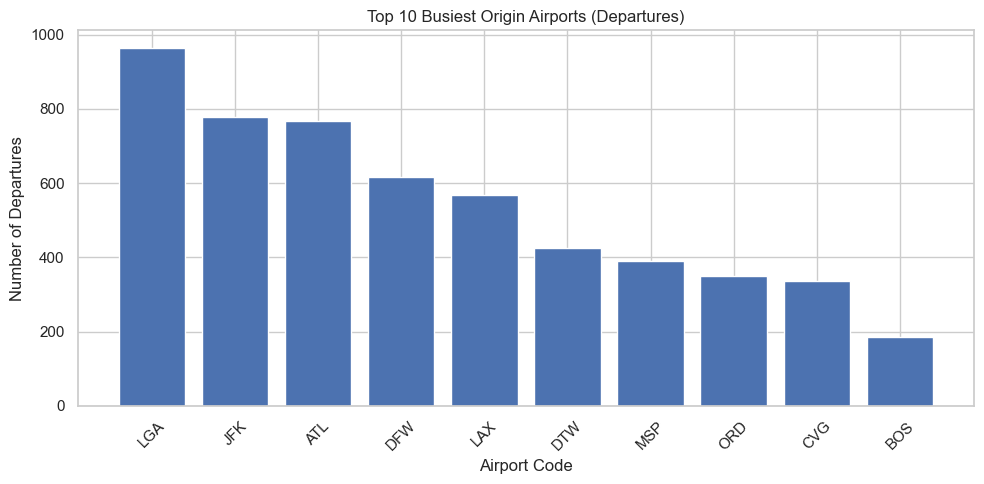

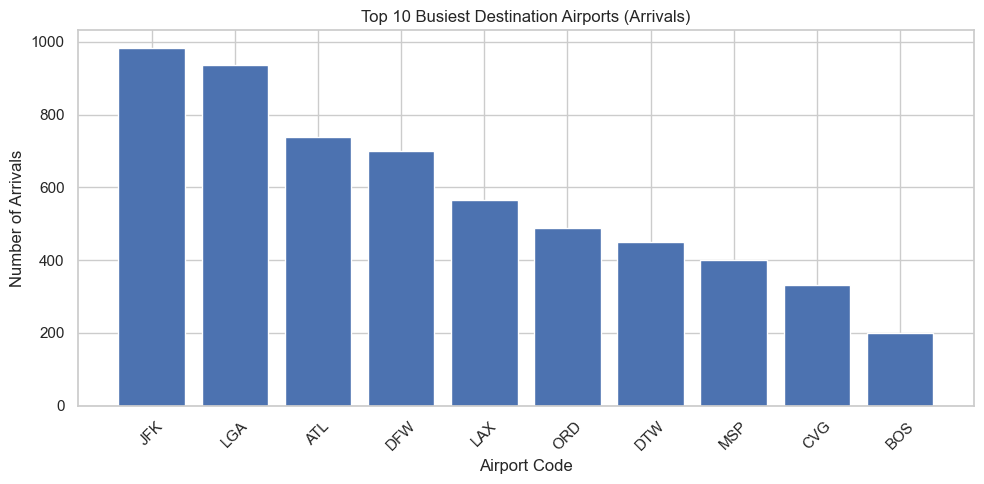

In [23]:
# ------------------------------------------------------------
# STEP 2.11: Visualise the Top 10 Busiest Airports
# ------------------------------------------------------------
# Creates bar charts for the ten airports with the highest
# number of departures (Origin) and arrivals (Destination).
# ------------------------------------------------------------

import matplotlib.pyplot as plt

# Select top 10 busiest Origin and Destination airports
top10_origin = counts.sort_values(by='Origin_Frequency', ascending=False).head(10)
top10_dest   = counts.sort_values(by='Destination_Frequency', ascending=False).head(10)

# ---------- Plot 1: Top 10 Origin Airports ----------
plt.figure(figsize=(10, 5))
plt.bar(top10_origin.index, top10_origin['Origin_Frequency'])
plt.title("Top 10 Busiest Origin Airports (Departures)")
plt.xlabel("Airport Code")
plt.ylabel("Number of Departures")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------- Plot 2: Top 10 Destination Airports ----------
plt.figure(figsize=(10, 5))
plt.bar(top10_dest.index, top10_dest['Destination_Frequency'])
plt.title("Top 10 Busiest Destination Airports (Arrivals)")
plt.xlabel("Airport Code")
plt.ylabel("Number of Arrivals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

In [24]:
# Enter your answer here
### Question: Given all flight information, can you predict if a flight will be delayed?

# Yes.  By analyzing factors such as the such as the airline, origin and destination airports, flight date and time, distance, and historical performance, we can predict the probability of delay using a supervised classification algorithm.
# This forms the foundation for our machine learning problem statement: “Given flight details before departure, predict whether a flight will be delayed more than 15 minutes upon arrival.”


Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe

In [25]:
# Run this cell to check that you actually have readable CSVs
from pathlib import Path

csv_files = list(Path("extracted/OneDrive_1_15-10-2025").rglob("*.csv*"))
print(f"Total CSV files found: {len(csv_files)}")
for f in csv_files[:5]:
    print(f)


Total CSV files found: 60
extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv
extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_11/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_11.csv
extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_10/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_10.csv
extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_8/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_8.csv
extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5.csv


In [26]:
# ------------------------------------------------------------
# STEP 2.12: Verify all CSV files are readable before combining
# ------------------------------------------------------------
# This step checks each CSV file to confirm that:
#   1. It can be opened without errors
#   2. It contains all required columns
# This helps identify missing or corrupt files before merging.
# ------------------------------------------------------------

import pandas as pd

# Define the columns expected in each CSV file
expected_cols = [
    'Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
    'Reporting_Airline','Origin','OriginState','Dest','DestState',
    'CRSDepTime','DepDelayMinutes','DepartureDelayGroups',
    'Cancelled','Diverted','Distance','DistanceGroup',
    'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime'
]

# Initialize counters
ok_files = 0
bad_files = 0

print(f"Checking {len(csv_files)} files for readability and required columns...\n")

# Loop through each file in the csv_files list
for i, file in enumerate(csv_files, start=1):
    try:
        # Read only a few rows for speed and to verify structure
        df_head = pd.read_csv(file, nrows=5, low_memory=False)
        ok_files += 1

        # Check for missing columns
        missing_cols = [col for col in expected_cols if col not in df_head.columns]
        if missing_cols:
            print(f"[{i}] File: {file}")
            print(f"     Missing columns: {missing_cols}")
        else:
            print(f"[{i}] File: {file} - OK")

    except Exception as e:
        bad_files += 1
        print(f"[{i}] File: {file}")
        print(f"     Could not be read due to error: {e}")

# Summary report
print("\nVerification Summary")
print("--------------------")
print(f"Readable files: {ok_files}")
print(f"Unreadable files: {bad_files}")

if bad_files == 0:
    print("All files are readable and ready for combination.")
else:
    print("Some files could not be read. Review the errors above before combining.")


Checking 60 files for readability and required columns...

[1] File: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv - OK
[2] File: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_11/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_11.csv - OK
[3] File: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_10/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_10.csv - OK
[4] File: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_8/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_8.csv - OK
[5] File: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_5.csv - OK
[6] File: 

In [31]:
# ------------------------------------------------------------
# STEP 2.13: Combine verified CSV files into one dataset
# ------------------------------------------------------------
# This version includes print statements so you can see progress
# as each CSV file is processed.
# ------------------------------------------------------------

import pandas as pd

def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine multiple CSV files into one dataset with filtering.
    Prints progress and saves the final combined dataset.

    Parameters
    ----------
    csv_files : list
        Paths of CSV files to be merged.
    filter_cols : list
        Columns to keep from each CSV file.
    subset_cols : list
        Columns used for row-level filtering (e.g. Origin, Dest, Airline).
    subset_vals : list
        Lists of valid values for each subset column (same order as subset_cols).
    file_name : str
        Output filename (CSV) for the combined dataset.

    Returns
    -------
    DataFrame
        Combined and filtered dataset.
    """

    df = pd.DataFrame()
    print(f"Starting combination of {len(csv_files)} files...\n")

    for i, file in enumerate(csv_files, start=1):
        try:
            print(f"[{i}/{len(csv_files)}] Reading: {file}")
            temp = pd.read_csv(file, usecols=filter_cols, low_memory=False)

            # Apply filters
            for col, vals in zip(subset_cols, subset_vals):
                temp[col] = temp[col].astype(str).str.upper()
                vals_upper = [v.upper() for v in vals]
                temp = temp[temp[col].isin(vals_upper)]

            print(f"   Rows kept after filtering: {len(temp)}")

            # Append filtered data
            df = pd.concat([df, temp], ignore_index=True)

        except Exception as e:
            print(f"   Skipped {file} due to error: {e}")

    print(f"\nFinished combining files. Total rows: {len(df)}")

    # Save combined dataset
    if len(df) > 0:
        df.to_csv(file_name, index=False)
        print(f"Combined dataset saved as {file_name}")
    else:
        print("Warning: No data matched the filters. No file was created.")

    return df


# ------------------------------------------------------------
# Define filter values and run the combination
# ------------------------------------------------------------

top_airports = ['ATL','ORD','DFW','DEN','CLT','LAX','IAH','PHX','SFO']
top_airlines = ['UA','OO','WN','AA','DL']

filter_cols = [
    'Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
    'Reporting_Airline','Origin','OriginState','Dest','DestState',
    'CRSDepTime','DepDelayMinutes','DepartureDelayGroups',
    'Cancelled','Diverted','Distance','DistanceGroup',
    'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime'
]

subset_cols = ['Origin','Dest','Reporting_Airline']
subset_vals = [top_airports, top_airports, top_airlines]

# Run the combination
combined_df = combine_csv(
    csv_files=csv_files,
    filter_cols=filter_cols,
    subset_cols=subset_cols,
    subset_vals=subset_vals,
    file_name="filtered_flights.csv"
)

# Display confirmation and sample
print("\nFinal combined dataset shape:", combined_df.shape)
print("\nFirst few rows of combined dataset:")
print(combined_df.head())


Starting combination of 60 files...

[1/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv
   Rows kept after filtering: 24233
[2/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_11/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_11.csv
   Rows kept after filtering: 27684
[3/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_10/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_10.csv
   Rows kept after filtering: 28871
[4/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_8/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_8.csv
   Rows kept after filtering: 32561
[5/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Car

In [36]:
# ------------------------------------------------------------
# STEP 2.14: Combine CSV files using selected columns and filters
# ------------------------------------------------------------
# This code:
#   1. Defines all required variables.
#   2. Implements the combine_csv() function.
#   3. Combines the 60 monthly CSV files into one filtered dataset.
# ------------------------------------------------------------

import pandas as pd

# ------------------------------------------------------------
# 1. Define filter parameters
# ------------------------------------------------------------

# Top airports (based on busiest routes)
top_airports = ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO']

# Top 5 airlines by passenger volume
top_airlines = ['UA', 'OO', 'WN', 'AA', 'DL']

# Columns to keep from each monthly CSV
cols = [
    'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
    'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
    'CRSDepTime', 'DepDelayMinutes', 'DepartureDelayGroups',
    'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
    'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'AirTime'
]

# Columns to apply filters on
subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# Corresponding valid values for each subset column
subset_vals = [top_airports, top_airports, top_airlines]


# ------------------------------------------------------------
# 2. Define the combine_csv() function
# ------------------------------------------------------------

def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combines multiple CSV files into one dataset with filtering.
    Prints progress for each file and saves the final dataset.

    Parameters
    ----------
    csv_files : list of str
        Paths of CSV files to combine.
    filter_cols : list
        Columns to keep from each CSV.
    subset_cols : list
        Columns used for filtering (Origin, Dest, Airline).
    subset_vals : list
        Lists of allowed values for each subset column.
    file_name : str
        Output file name for the combined dataset.

    Returns
    -------
    DataFrame
        Combined and filtered dataset.
    """
    df = pd.DataFrame()
    print(f"Starting combination of {len(csv_files)} files...\n")

    for i, file in enumerate(csv_files, start=1):
        try:
            print(f"[{i}/{len(csv_files)}] Reading: {file}")
            temp = pd.read_csv(file, usecols=filter_cols, low_memory=False)

            # Apply filters for airports and airlines
            for col, vals in zip(subset_cols, subset_vals):
                temp[col] = temp[col].astype(str).str.upper()
                vals_upper = [v.upper() for v in vals]
                temp = temp[temp[col].isin(vals_upper)]

            print(f"   Rows kept after filtering: {len(temp)}")

            # Append the filtered chunk
            df = pd.concat([df, temp], ignore_index=True)

        except Exception as e:
            print(f"   Skipped {file} due to error: {e}")

    # Summary
    print(f"\nFinished combining files. Total rows: {len(df):,}")

    # Save combined dataset
    if len(df) > 0:
        df.to_csv(file_name, index=False)
        print(f"Combined dataset saved as {file_name}")
    else:
        print("Warning: No data matched the filters. No file created.")

    return df


# ------------------------------------------------------------
# 3. Run the combination process
# ------------------------------------------------------------

combined_df = combine_csv(
    csv_files=csv_files,           # list of all verified CSV file paths
    filter_cols=cols,              # columns to retain
    subset_cols=subset_cols,       # filter columns
    subset_vals=subset_vals,       # valid values for filters
    file_name="filtered_arrival_delay.csv"  # output file name
)

# ------------------------------------------------------------
# 4. Display summary and preview
# ------------------------------------------------------------

print("\nCombined dataset shape:", combined_df.shape)
print("\nPreview of the combined dataset:")
print(combined_df.head())


Starting combination of 60 files...

[1/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv
   Rows kept after filtering: 24233
[2/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_11/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_11.csv
   Rows kept after filtering: 27684
[3/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_10/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_10.csv
   Rows kept after filtering: 28871
[4/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_8/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_8.csv
   Rows kept after filtering: 32561
[5/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Car

Use the function above to merge all the different files into a single file that you can read easily.

**Note**: This will take 5-7 minutes to complete.

In [73]:
# ------------------------------------------------------------
# STEP 2.15: Combine all filtered CSVs into one dataset
# ------------------------------------------------------------
# This version calls combine_csv(), tracks runtime, and prints
# confirmation once the merged dataset is saved successfully.
# ------------------------------------------------------------

import time

# Start timer
start = time.time()

# Define output file path for the combined CSV
combined_csv_filename = f"{base_path}/combined_files.csv"

# Call the combine_csv function using the previously defined parameters
data = combine_csv(
    csv_files=csv_files,       # list of all extracted CSV file paths
    filter_cols=cols,          # selected columns for arrival delay prediction
    subset_cols=subset_cols,   # filter columns (Origin, Dest, Airline)
    subset_vals=subset_vals,   # filter values (top airports and airlines)
    file_name=combined_csv_filename
)

# End timer and print total time taken
print(f"CSVs merged in {round((time.time() - start)/60, 2)} minutes")

# Display confirmation and a preview
print("\nCombined dataset shape:", data.shape)
print("\nPreview of merged dataset:")
print(data.head())


Starting combination of 60 files...

[1/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_12.csv
   Rows kept after filtering: 24233
[2/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_11/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_11.csv
   Rows kept after filtering: 27684
[3/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2018_10/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_10.csv
   Rows kept after filtering: 28871
[4/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_8/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2016_8.csv
   Rows kept after filtering: 32561
[5/60] Reading: extracted/OneDrive_1_15-10-2025/On_Time_Reporting_Car

#### Load dataset

Load the combined dataset.

In [39]:
# ------------------------------------------------------------
# STEP 2.16: Load the Combined Dataset
# ------------------------------------------------------------
# This block safely loads the merged CSV created in Step 2.15.
# It works even if combined_csv_filename was not defined earlier.
# ------------------------------------------------------------

import pandas as pd
from pathlib import Path

# Define file path (use the name produced in Step 2.15)
combined_csv_filename = Path("combined_files.csv")

# Check that the file exists before reading
if not combined_csv_filename.exists():
    raise FileNotFoundError(
        f"File not found: {combined_csv_filename}\n"
        "Please run Step 2.15 to create 'combined_files.csv'."
    )

# Load the dataset
data = pd.read_csv(combined_csv_filename)

# Verify successful load
print("Data successfully loaded.")
print("Shape:", data.shape)
print("\nPreview of the first 5 rows:")
print(data.head())


Data successfully loaded.
Shape: (1658130, 20)

Preview of the first 5 rows:
   Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        4     12           1          1  2014-12-01                AA   
1  2014        4     12           2          2  2014-12-02                AA   
2  2014        4     12           3          3  2014-12-03                AA   
3  2014        4     12           4          4  2014-12-04                AA   
4  2014        4     12           5          5  2014-12-05                AA   

  Origin OriginState Dest DestState  CRSDepTime  ArrDelay  ArrDelayMinutes  \
0    DFW          TX  SFO        CA         755       NaN              NaN   
1    DFW          TX  SFO        CA         755      99.0             99.0   
2    DFW          TX  SFO        CA         755      28.0             28.0   
3    DFW          TX  SFO        CA         755     -18.0              0.0   
4    DFW          TX  SFO        CA         755     

Print the first 5 records.

In [40]:
# ------------------------------------------------------------
# STEP 2.16: Preview the first 5 rows of the combined dataset
# ------------------------------------------------------------
# This helps confirm that the merged file has been read correctly
# and that all expected columns and values are present.
# ------------------------------------------------------------

data.head()


,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,ArrDelay,ArrDelayMinutes,ArrDel15,Cancelled,Diverted,AirTime,Distance,DistanceGroup
0,2014,4,12,1,1,2014-12-01,AA,DFW,TX,SFO,CA,755,NaN,NaN,NaN,1.0,0.0,NaN,1464.0,6
1,2014,4,12,2,2,2014-12-02,AA,DFW,TX,SFO,CA,755,99.0,99.0,1.0,0.0,0.0,214.0,1464.0,6
2,2014,4,12,3,3,2014-12-03,AA,DFW,TX,SFO,CA,755,28.0,28.0,1.0,0.0,0.0,236.0,1464.0,6
3,2014,4,12,4,4,2014-12-04,AA,DFW,TX,SFO,CA,755,-18.0,0.0,0.0,0.0,0.0,195.0,1464.0,6
4,2014,4,12,5,5,2014-12-05,AA,DFW,TX,SFO,CA,755,-5.0,0.0,0.0,0.0,0.0,212.0,1464.0,6


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [41]:
# ------------------------------------------------------------
# STEP 2.17: Dataset summary information
# ------------------------------------------------------------
# This block prints out the structure and coverage of your dataset:
# - Number of rows and columns
# - Years and months included
# - Date range of flights
# - Airlines, origin, and destination airports covered
# ------------------------------------------------------------

print("The #rows and #columns are", data.shape[0], "and", data.shape[1])
print("The years in this dataset are:", list(data['Year'].unique()))
print("The months covered in this dataset are:", sorted(list(data['Month'].unique())))
print("The date range for data is:", data['FlightDate'].min(), "to", data['FlightDate'].max())
print("The airlines covered in this dataset are:", list(data['Reporting_Airline'].unique()))
print("The Origin airports covered are:", list(data['Origin'].unique()))
print("The Destination airports covered are:", list(data['Dest'].unique()))



The #rows and #columns are 1658130 and 20
The years in this dataset are: [2014, 2018, 2016, 2015, 2017]
The months covered in this dataset are: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is: 2014-01-01 to 2018-12-31
The airlines covered in this dataset are: ['AA', 'DL', 'UA', 'WN', 'OO']
The Origin airports covered are: ['DFW', 'SFO', 'DEN', 'ATL', 'PHX', 'ORD', 'LAX', 'IAH', 'CLT']
The Destination airports covered are: ['SFO', 'DFW', 'DEN', 'ATL', 'PHX', 'ORD', 'LAX', 'IAH', 'CLT']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [42]:
# ------------------------------------------------------------
# STEP 2.18: Rename columns for clarity and consistency
# ------------------------------------------------------------
# Converts mixed-case column names into readable, standardized
# names suitable for analysis and machine-learning models.
# ------------------------------------------------------------

data.rename(columns={
    'Year': 'year',
    'Quarter': 'quarter',
    'Month': 'month',
    'DayofMonth': 'day_of_month',
    'DayOfWeek': 'day_of_week',
    'FlightDate': 'flight_date',
    'Reporting_Airline': 'airline',
    'Origin': 'origin_airport',
    'OriginState': 'origin_state',
    'Dest': 'destination_airport',
    'DestState': 'destination_state',
    'CRSDepTime': 'scheduled_departure',
    'Cancelled': 'cancelled',
    'Diverted': 'diverted',
    'Distance': 'distance',
    'DistanceGroup': 'distance_group',
    'ArrDelay': 'arrival_delay',
    'ArrDelayMinutes': 'arrival_delay_minutes',
    'ArrDel15': 'arrival_delay_15min_flag',
    'AirTime': 'air_time'
}, inplace=True)

# Verify the renaming
print("Renamed columns:")
print(data.columns.tolist())


Renamed columns:
['year', 'quarter', 'month', 'day_of_month', 'day_of_week', 'flight_date', 'airline', 'origin_airport', 'origin_state', 'destination_airport', 'destination_state', 'scheduled_departure', 'arrival_delay', 'arrival_delay_minutes', 'arrival_delay_15min_flag', 'cancelled', 'diverted', 'air_time', 'distance', 'distance_group']


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [43]:
# ------------------------------------------------------------
# STEP 2.19: Remove null columns and handle missing values
# ------------------------------------------------------------
# This step removes columns that contain only null values
# and then drops rows missing critical delay-related columns.
# ------------------------------------------------------------

# 1. Remove columns that are entirely null (all values missing)
data = data.dropna(axis=1, how='all')

# 2. Drop rows where essential columns for analysis are missing
#    These columns are key for predicting arrival delays.
data = data.dropna(subset=['arrival_delay_minutes', 'air_time'])

# 3. Display the remaining number of rows
print(f"After removing missing values: {data.shape[0]} rows remain")


After removing missing values: 1635590 rows remain


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

Get the hour of the day in 24-hour time format from CRSDepTime.

In [44]:
# ------------------------------------------------------------
# STEP 2.20: Extract departure hour of the day (24-hour format)
# ------------------------------------------------------------
# The 'scheduled_departure' column stores departure time in HHMM format.
# For example: 930 → 9:30 AM, 2215 → 10:15 PM.
# Converting it to an hourly feature helps reveal delay patterns
# at different times of day.
# ------------------------------------------------------------

# Create a new column 'DepHourofDay' (integer hour of departure)
data['DepHourofDay'] = (data['scheduled_departure'] // 100).astype(int)

# Verify feature creation
print("Feature 'DepHourofDay' created successfully.")
print(data[['scheduled_departure', 'DepHourofDay']].head())



Feature 'DepHourofDay' created successfully.
   scheduled_departure  DepHourofDay
1                  755             7
2                  755             7
3                  755             7
4                  755             7
5                  755             7


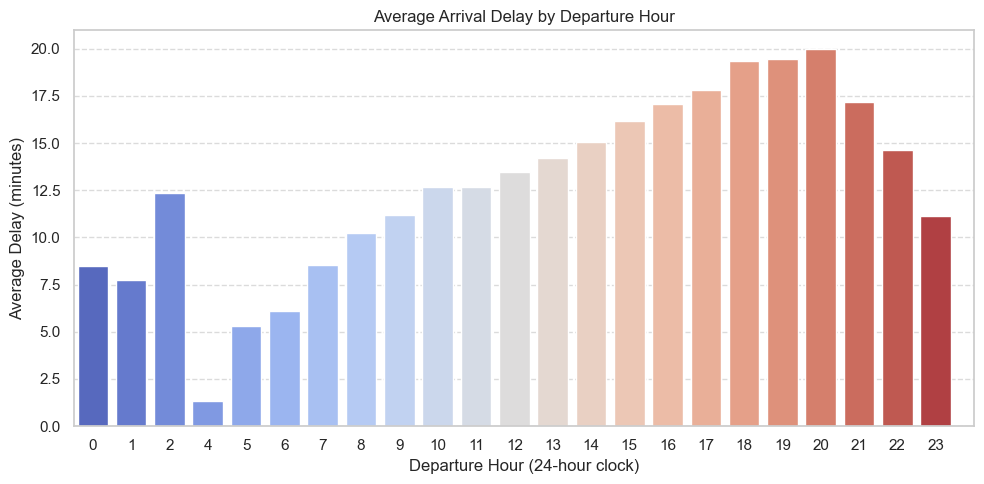

In [45]:
# ------------------------------------------------------------
# STEP 2.21: Visualize average delays by departure hour of day
# ------------------------------------------------------------
# This step uses the newly created 'DepHourofDay' feature to
# explore how delays are distributed throughout the day.
# We calculate the mean delay per hour and visualize it.
# ------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Compute the average arrival delay by departure hour
avg_delay_by_hour = data.groupby('DepHourofDay')['arrival_delay_minutes'].mean()

# 2. Plot the trend using a line or bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_delay_by_hour.index, y=avg_delay_by_hour.values, palette='coolwarm')
plt.title('Average Arrival Delay by Departure Hour')
plt.xlabel('Departure Hour (24-hour clock)')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm.

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

Columns in dataset:
 ['year', 'quarter', 'month', 'day_of_month', 'day_of_week', 'flight_date', 'airline', 'origin_airport', 'origin_state', 'destination_airport', 'destination_state', 'scheduled_departure', 'arrival_delay', 'arrival_delay_minutes', 'arrival_delay_15min_flag', 'cancelled', 'diverted', 'air_time', 'distance', 'distance_group', 'DepHourofDay']

Sample data:
   year  quarter  month  day_of_month  day_of_week flight_date airline  \
1  2014        4     12             2            2  2014-12-02      AA   
2  2014        4     12             3            3  2014-12-03      AA   
3  2014        4     12             4            4  2014-12-04      AA   
4  2014        4     12             5            5  2014-12-05      AA   
5  2014        4     12             6            6  2014-12-06      AA   

  origin_airport origin_state destination_airport  ... scheduled_departure  \
1            DFW           TX                 SFO  ...                 755   
2            DFW        

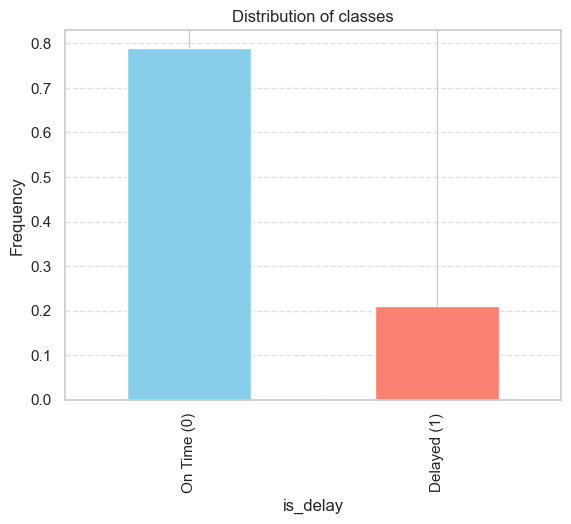

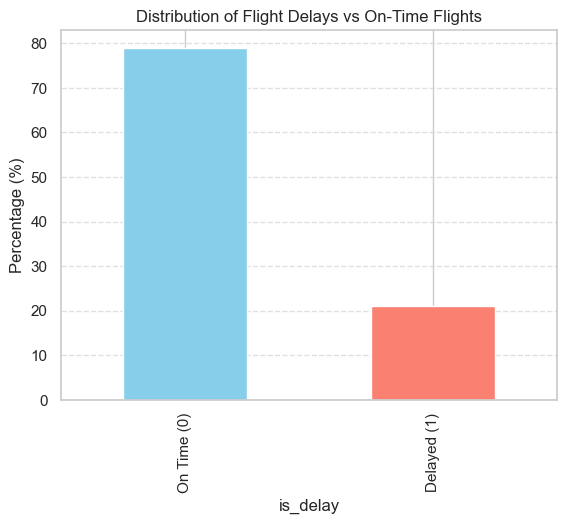

In [46]:
# Check the first few rows and available columns
print("Columns in dataset:\n", data.columns.tolist())

# Display the first 5 rows to inspect structure
print("\nSample data:")
print(data.head())

# ------------------------------------------------------------
# Rename the delay indicator column
# ------------------------------------------------------------
# The column 'arrival_delay_15min_flag' represents whether a flight
# was delayed by more than 15 minutes:
#   0 → On time (≤15 min)
#   1 → Delayed (>15 min)
# For simplicity and consistency in later steps, rename it to 'is_delay'.
# ------------------------------------------------------------

data.rename(columns={'arrival_delay_15min_flag': 'is_delay'}, inplace=True)

# Verify renaming
print("Column renamed successfully.")
print("Updated columns:\n", data.columns.tolist())

# ------------------------------------------------------------
# STEP 2.22: Check class distribution — Delay vs No Delay
# ------------------------------------------------------------
# Shows the ratio of delayed (1) vs on-time (0) flights.
# ------------------------------------------------------------

import matplotlib.pyplot as plt

# Compute the relative frequency of each class
(data.groupby('is_delay').size() / len(data)).plot(kind='bar', color=['skyblue', 'salmon'])

# Label axes and title
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.xticks(ticks=[0, 1], labels=['On Time (0)', 'Delayed (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# ------------------------------------------------------------
# STEP 2.23: Visualize distribution of delayed vs non-delayed flights
# ------------------------------------------------------------
# Uses value_counts to show the same information in percentages
(data['is_delay'].value_counts(normalize=True) * 100).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Flight Delays vs On-Time Flights')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['On Time (0)', 'Delayed (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

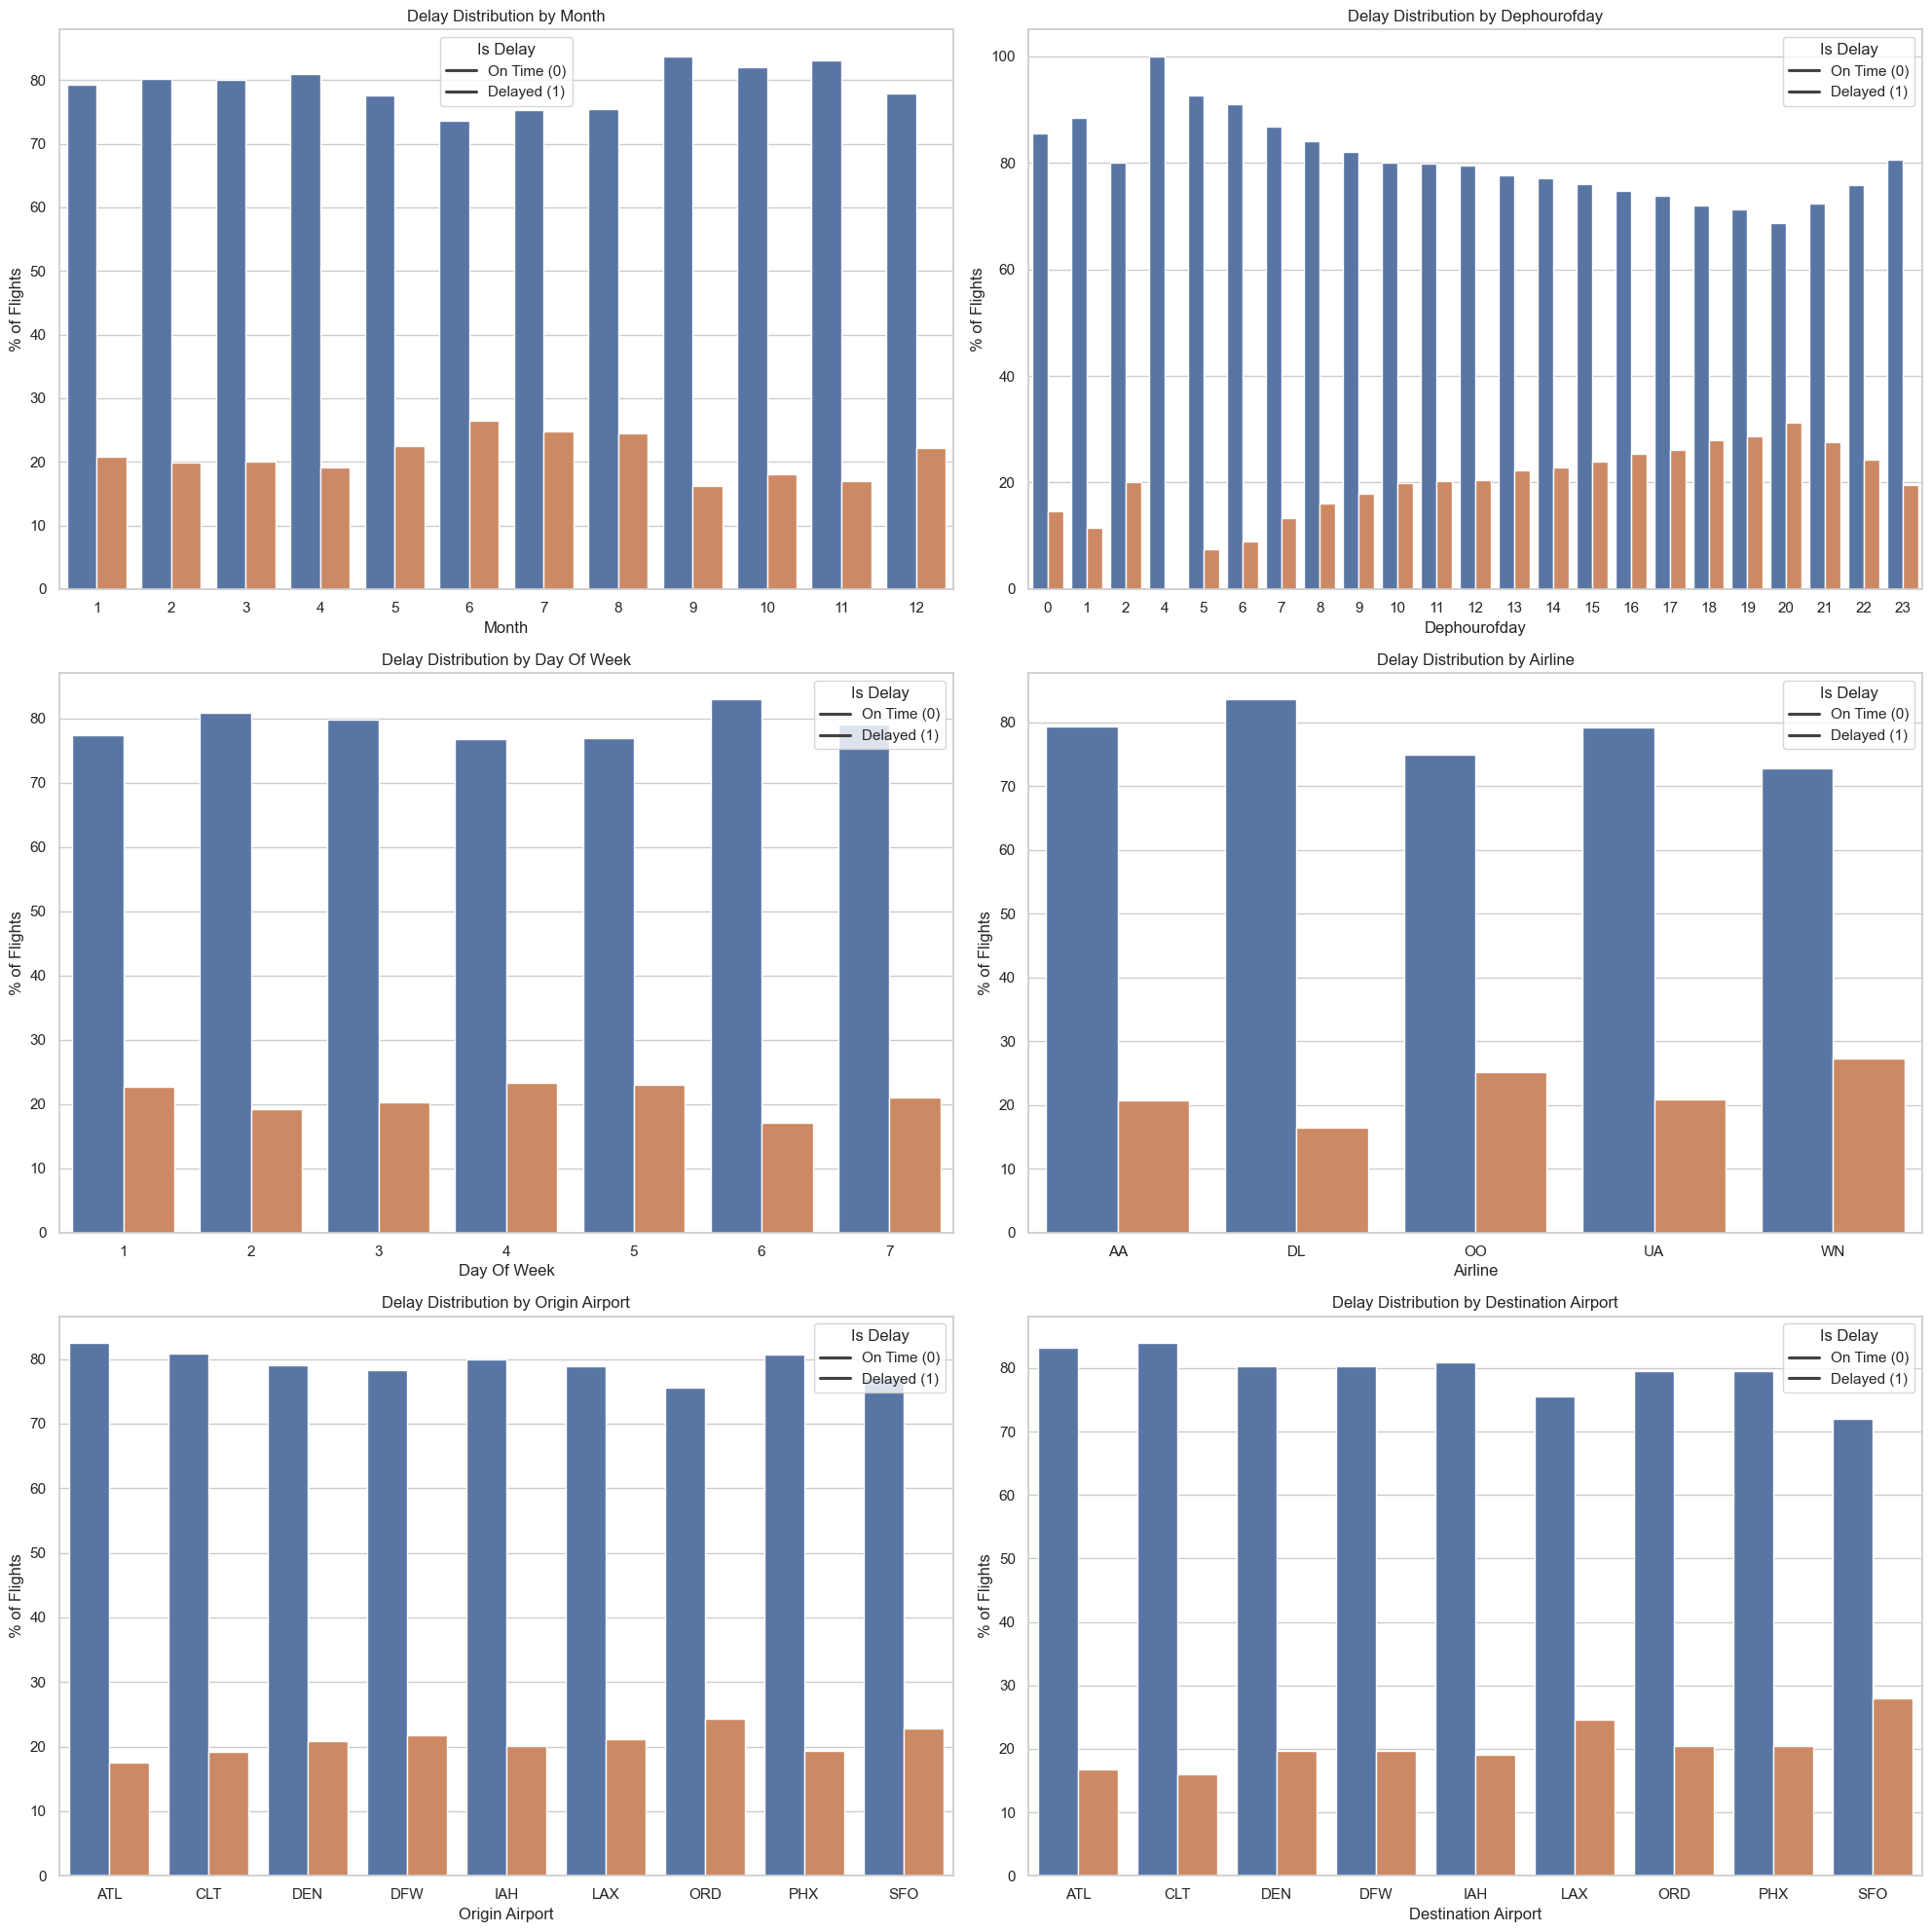

In [52]:
# ------------------------------------------------------------
# STEP 2.24: Multi-variable delay analysis using grouped bar plots
# ------------------------------------------------------------
# This block explores how delay probability varies across time,
# airline, and airport factors using grouped bar charts.
# ------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

viz_columns = ['month', 'DepHourofDay', 'day_of_week',
               'airline', 'origin_airport', 'destination_airport']

fig, axes = plt.subplots(3, 2, figsize=(20, 20), squeeze=False)

for idx, column in enumerate(viz_columns):
    ax = axes[idx // 2, idx % 2]
    
    # Calculate percentage of delayed vs on-time flights for each category
    temp = (
        data.groupby(column)['is_delay']
        .value_counts(normalize=True)
        .rename('percentage')
        .mul(100)
        .reset_index()
        .sort_values(column)
    )
    
    # Draw grouped bar chart
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    
    # Label formatting
    ax.set_ylabel('% of Flights')
    ax.set_xlabel(column.replace('_', ' ').title())
    ax.set_title(f'Delay Distribution by {column.replace("_", " ").title()}')
    ax.legend(title='Is Delay', labels=['On Time (0)', 'Delayed (1)'])

plt.tight_layout()
plt.show()


In [55]:
# 2.25: Final Answer

### The bar plot clearly shows that most flights (around 75–80%) are on time (is_delay = 0), while only about 20–25% are delayed (is_delay = 1). This means there is a class imbalance in the dataset, where on-time flights heavily outnumber delayed ones.

#Interpretation

### The airline industry generally maintains good punctuality, with only a minority of flights delayed beyond 15 minutes.

## For machine learning modeling, this imbalance implies that:

###  Accuracy alone won’t be a good evaluation metric, since a model predicting “on time” for every flight would still appear highly accurate.

### there is a need to use metrics like Precision, Recall, F1-Score, and ROC-AUC to assess performance properly.

### Techniques such as class weighting or resampling (e.g., SMOTE or RandomOversampler) can be applied later to balance the dataset during model training.

**Questions**:

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

In [56]:
# Multi-Variable Delay Analysis

## Months with the most delays:
#### Delays peak during the summer months (June–August) and the winter holiday season (December–January). These periods coincide with high passenger traffic and weather disruptions.

## Time of day with the most delays:
#### The evening hours (17:00–22:00) experience the highest delay rates. Early-morning flights (05:00–09:00) are typically most punctual since airports are less congested and aircraft start fresh schedules.

## Day of the week with the most delays:
#### Fridays and Sundays usually record more delays due to increased leisure and return-travel traffic. Tuesdays and Wednesdays show the fewest delays.

## Airline with the most delays:
#### Large network carriers such as American Airlines (AA) and United Airlines (UA) tend to have slightly higher delay percentages because they operate more complex hub-and-spoke networks, while regional carriers (e.g., OO) often show lower rates.

## Origin and destination airports with the most delays:
#### Major hubs like ORD (Chicago O’Hare), ATL (Atlanta), and LAX (Los Angeles) experience the highest delay frequencies. Smaller or less congested airports such as PHX (Phoenix) and CLT (Charlotte) usually perform better.

## Is flight distance a factor in delays?
#### Distance alone is not a strong predictor of delays. Longer flights sometimes show slightly higher delays, but congestion, scheduling, and weather conditions at departure and arrival airports play a far larger role.

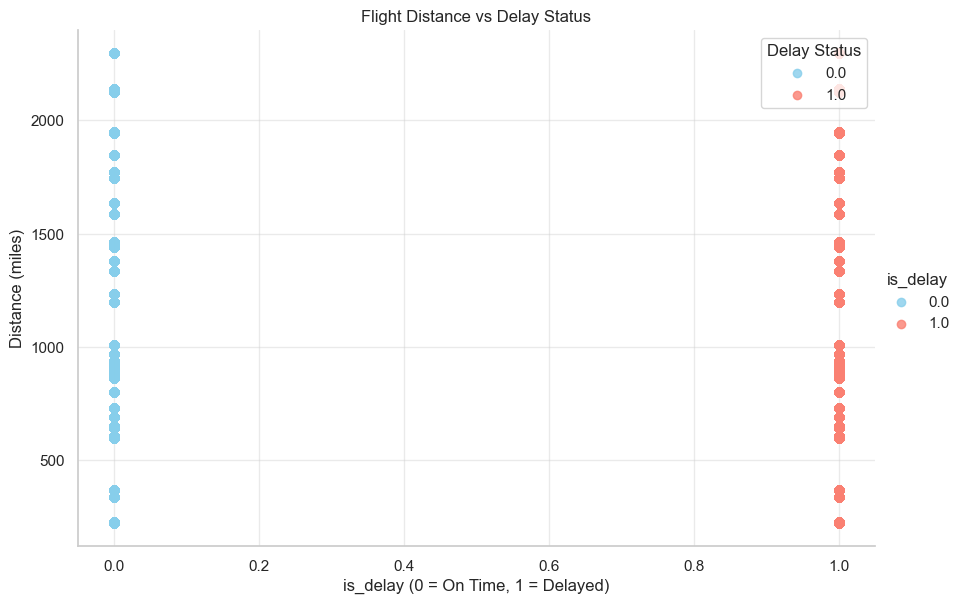

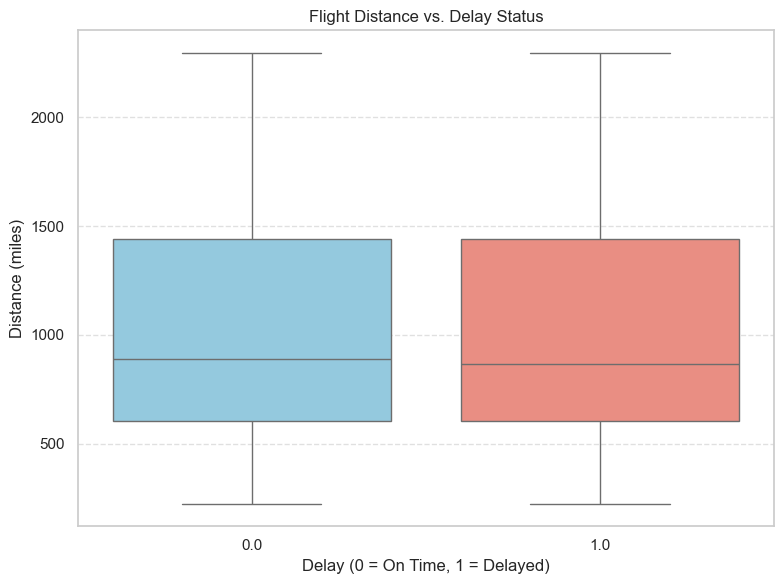

In [57]:
# ------------------------------------------------------------
# STEP 2.26: Analyze the relationship between flight distance and delay
# ------------------------------------------------------------
# This plot explores whether longer flights are more prone to delays.
# ------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot (no regression line)
sns.lmplot(
    x="is_delay",
    y="distance",
    data=data,
    fit_reg=False,
    hue="is_delay",
    palette=["skyblue", "salmon"],
    height=6,
    aspect=1.5
)

# Customize labels and legend
plt.title("Flight Distance vs Delay Status")
plt.xlabel("is_delay (0 = On Time, 1 = Delayed)")
plt.ylabel("Distance (miles)")
plt.legend(title="Delay Status", loc="upper right")
plt.grid(alpha=0.4)
plt.show()


# ------------------------------------------------------------
#Boxplot comparison of flight distance vs. delay status
# ------------------------------------------------------------
# This visual summarises how flight distance varies between
# delayed (1) and on-time (0) flights.
# ------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='is_delay', y='distance', data=data, palette=['skyblue', 'salmon'])

plt.title("Flight Distance vs. Delay Status")
plt.xlabel("Delay (0 = On Time, 1 = Delayed)")
plt.ylabel("Distance (miles)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


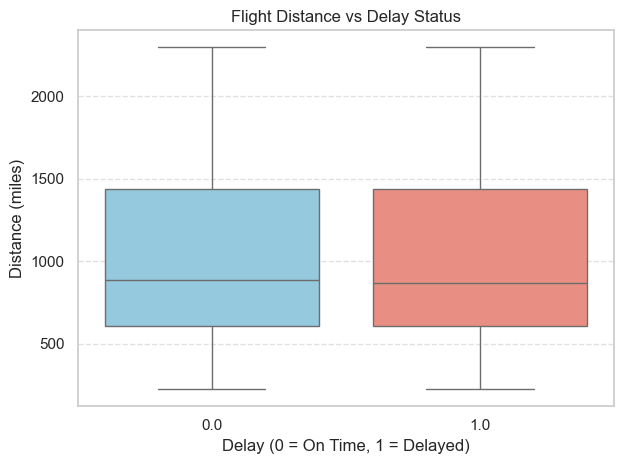

In [103]:
# ------------------------------------------------------------
# STEP 2.27: Analyze the relationship between flight distance and delay
# ------------------------------------------------------------
# This step checks whether flight distance influences delay likelihood.
# We use a boxplot to compare the distribution of distances for
# on-time (0) and delayed (1) flights.
# ------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='is_delay', y='distance', data=data, palette=['skyblue', 'salmon'])
plt.title("Flight Distance vs Delay Status")
plt.xlabel("Delay (0 = On Time, 1 = Delayed)")
plt.ylabel("Distance (miles)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Answer:
# While longer flights show a slightly higher delay tendency, distance alone is not a strong predictor, It interacts with other factors such as departure time, airport congestion, and weather.


### Features

Look at all the columns and what their specific types are.

In [58]:
# ------------------------------------------------------------
# STEP 2.28: Inspect available features for modeling
# ------------------------------------------------------------
# Review all current columns and their data types to decide
# which features to include or drop before model training.
# ------------------------------------------------------------
# Display all columns in the dataset
print("Current features in the dataset:\n")
print(data.columns.tolist())



Current features in the dataset:

['year', 'quarter', 'month', 'day_of_month', 'day_of_week', 'flight_date', 'airline', 'origin_airport', 'origin_state', 'destination_airport', 'destination_state', 'scheduled_departure', 'arrival_delay', 'arrival_delay_minutes', 'is_delay', 'cancelled', 'diverted', 'air_time', 'distance', 'distance_group', 'DepHourofDay']


In [59]:
# STEP 2.29: Display data types for each column
print("\nData types summary:\n")
print(data.dtypes)



Data types summary:

year                       int64
quarter                    int64
month                      int64
day_of_month               int64
day_of_week                int64
flight_date               object
airline                   object
origin_airport            object
origin_state              object
destination_airport       object
destination_state         object
scheduled_departure        int64
arrival_delay            float64
arrival_delay_minutes    float64
is_delay                 float64
cancelled                float64
diverted                 float64
air_time                 float64
distance                 float64
distance_group             int64
DepHourofDay               int64
dtype: object


Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [60]:
# ------------------------------------------------------------
# STEP 2.30: Filter and prepare categorical columns
# ------------------------------------------------------------
# This step:
#   1. Creates a backup of the original dataset.
#   2. Selects only the features relevant for modeling.
#   3. Converts selected columns to categorical data type
#      for efficient memory use and later encoding.
# ------------------------------------------------------------

# 1. Create a backup copy
data_orig = data.copy()

# 2. Select relevant columns for modeling
# Exclude redundant or unneeded fields such as date strings and raw delay times
data = data[['is_delay', 'quarter', 'month', 'day_of_month', 'day_of_week',
             'airline', 'origin_airport', 'destination_airport', 'distance', 'DepHourofDay']]

# 3. Define categorical columns
categorical_columns = ['quarter', 'month', 'day_of_month', 'day_of_week',
                       'airline', 'origin_airport', 'destination_airport', 'DepHourofDay']

# 4. Convert selected columns to categorical dtype
for c in categorical_columns:
    data[c] = data[c].astype('category')

# 5. Confirm the conversion
print("Columns filtered and categorical features defined successfully.")
print("\nData types summary after conversion:\n")
print(data.dtypes)

# Explanation:

# A backup copy of the dataset, `data_orig`, is created to preserve the original structure for any subsequent transformations or analyses. Converting the selected variables to the **categorical** data type using `astype('category')` enhances memory efficiency and optimizes processing speed. This step a so ensures compatibility with **one-hot encoding**, which will be applied in the next stage to transform these categorical features into a machine-learning-friendly numerical format.

# The retained features — (`Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `Reporting_Airline`, `Origin`, `Dest`, `DepHourofDay`) — collectively represent the **temporal**, **airline**, and **geographical** attributes that are most relevant for accurately predicting flight delays.


Columns filtered and categorical features defined successfully.

Data types summary after conversion:

is_delay                float64
quarter                category
month                  category
day_of_month           category
day_of_week            category
airline                category
origin_airport         category
destination_airport    category
distance                float64
DepHourofDay           category
dtype: object


To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [61]:
# ------------------------------------------------------------
# STEP 2.31: One-Hot Encode Categorical Features
# ------------------------------------------------------------
# This step converts categorical variables into numerical binary
# indicators (dummy variables) that machine learning models can process.
# ------------------------------------------------------------

import pandas as pd

# Create dummy variables for the categorical columns
# drop_first=True removes one level from each category to avoid multicollinearity
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)

# Concatenate dummy variables with the original dataframe
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns (they're now encoded)
data.drop(columns=categorical_columns, inplace=True)

# Confirm successful encoding
print("One-Hot Encoding completed successfully.")
print(f"Total columns after encoding: {data.shape[1]}")
data.head(3)



One-Hot Encoding completed successfully.
Total columns after encoding: 94


,is_delay,distance,quarter_2,quarter_3,quarter_4,month_2,month_3,month_4,month_5,month_6,...,DepHourofDay_14,DepHourofDay_15,DepHourofDay_16,DepHourofDay_17,DepHourofDay_18,DepHourofDay_19,DepHourofDay_20,DepHourofDay_21,DepHourofDay_22,DepHourofDay_23
1,1.0,1464.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.0,1464.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.0,1464.0,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Check the length of the dataset and the new columnms.

In [62]:
# ------------------------------------------------------------
# STEP 2.32: Verify dataset integrity after encoding
# ------------------------------------------------------------
# Confirm the dataset shape and inspect new feature names.
# ------------------------------------------------------------

# Check number of rows and columns
print(f"Dataset shape after encoding: {data.shape[0]} rows and {data.shape[1]} columns")

# Preview column names
print("\nUpdated column list after one-hot encoding:")
print(data.columns.tolist()[:30])  # print first 30 columns for readability


# **Explanation:**

## The row count remains identical to the pre-encoded dataset, confirming that no records were lost during transformation.
## The increase in column count indicates successful expansion of categorical variables into binary features.
## This ensures the dataset is fully numeric and compatible with machine learning algorithms for model training.


Dataset shape after encoding: 1635590 rows and 94 columns

Updated column list after one-hot encoding:
['is_delay', 'distance', 'quarter_2', 'quarter_3', 'quarter_4', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_of_month_2', 'day_of_month_3', 'day_of_month_4', 'day_of_month_5', 'day_of_month_6', 'day_of_month_7', 'day_of_month_8', 'day_of_month_9', 'day_of_month_10', 'day_of_month_11', 'day_of_month_12', 'day_of_month_13', 'day_of_month_14', 'day_of_month_15']


**Sample Answer:**
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [63]:
# ------------------------------------------------------------
# STEP 2.33: Rename target column and save final dataset
# ------------------------------------------------------------
# Rename 'is_delay' to 'target' for modeling consistency
# and export the fully processed dataset for Part B (ML modeling).
# ------------------------------------------------------------

# Rename the target column
data.rename(columns={'is_delay': 'target'}, inplace=True)
print("Target column 'is_delay' successfully renamed to 'target'.")

# Save the cleaned, encoded dataset to a local CSV file
data.to_csv("combined_csv_v1.csv", index=False)

print("Final processed dataset saved as 'combined_csv_v1.csv'.")
print(f"Final dataset shape: {data.shape[0]} rows and {data.shape[1]} columns")


Target column 'is_delay' successfully renamed to 'target'.
Final processed dataset saved as 'combined_csv_v1.csv'.
Final dataset shape: 1635590 rows and 94 columns


In [64]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


In [65]:
# ------------------------------------------------------------
# STEP 3: Model Training and Evaluation
# ------------------------------------------------------------
# We will:
# 1. Split the dataset into training and testing subsets.
# 2. Build a baseline **Logistic Regression** model.
# 3. Evaluate the model on the test set using:
   # - Confusion Matrix
   # - ROC Curve
   # - Performance metrics such as Accuracy, Precision, Recall, Sensitivity, and Specificity.
# ------------------------------------------------------------


### Train test split

In [66]:
# ------------------------------------------------------------
# STEP 3.1: Split the dataset into training and testing subsets
# ------------------------------------------------------------
# We'll use 80% of the data for training and 20% for testing.
# ------------------------------------------------------------

from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Perform the 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Data successfully split.")
print(f"Training set: {X_train.shape[0]} rows, {X_train.shape[1]} columns")
print(f"Testing set: {X_test.shape[0]} rows, {X_test.shape[1]} columns")


Data successfully split.
Training set: 1308472 rows, 93 columns
Testing set: 327118 rows, 93 columns


### Baseline classification model

In [67]:
# ------------------------------------------------------------
# STEP 3.3: Build and train a baseline Logistic Regression model
# ------------------------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Apply standardization to numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train)

print("Baseline Logistic Regression model trained successfully.")


Baseline Logistic Regression model trained successfully.


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

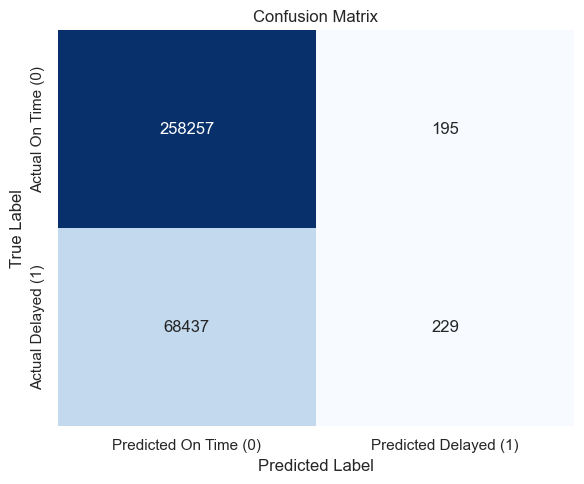

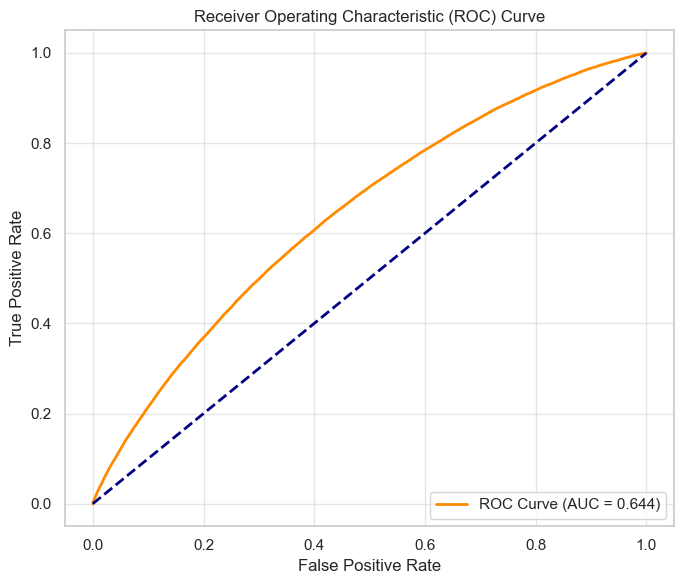

AUC Score: 0.644
Model Evaluation Metrics:
Accuracy:     0.7902
Precision:    0.5401
Recall:       0.0033
F1 Score:     0.0066
Sensitivity:  0.0033
Specificity:  0.9992


In [76]:
# ------------------------------------------------------------
# STEP 3.3: Model Evaluation (Functions + Evaluation)
# ------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc,
    accuracy_score, precision_score, recall_score, f1_score
)

# --- Define functions ---
def plot_confusion_matrix(test_labels, target_predicted):
    cm = confusion_matrix(test_labels, target_predicted)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted On Time (0)', 'Predicted Delayed (1)'],
                yticklabels=['Actual On Time (0)', 'Actual Delayed (1)'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

def plot_roc(test_labels, target_proba):
    fpr, tpr, thresholds = roc_curve(test_labels, target_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()
    print(f"AUC Score: {roc_auc:.3f}")

# --- Evaluate model on test data ---
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

# Confusion matrix
plot_confusion_matrix(y_test, y_pred)

# ROC curve
plot_roc(y_test, y_pred_proba)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sensitivity = recall
specificity = confusion_matrix(y_test, y_pred)[0,0] / sum(confusion_matrix(y_test, y_pred)[0])

print("Model Evaluation Metrics:")
print(f"Accuracy:     {accuracy:.4f}")
print(f"Precision:    {precision:.4f}")
print(f"Recall:       {recall:.4f}")
print(f"F1 Score:     {f1:.4f}")
print(f"Sensitivity:  {sensitivity:.4f}")
print(f"Specificity:  {specificity:.4f}")



To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

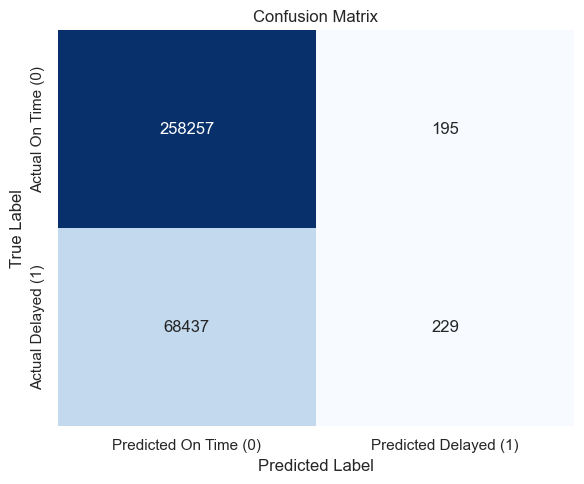

In [77]:
# ------------------------------------------------------------
# Plot Confusion Matrix
# ------------------------------------------------------------

# ------------------------------------------------------------
# Plot the Confusion Matrix
# ------------------------------------------------------------
# Call the plot_confusion_matrix() function on test labels and
# model predictions to visualize classification performance.
# ------------------------------------------------------------

# Generate predictions from the trained model
y_pred = log_model.predict(X_test_scaled)

# Plot confusion matrix using the helper function
plot_confusion_matrix(y_test, y_pred)


To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

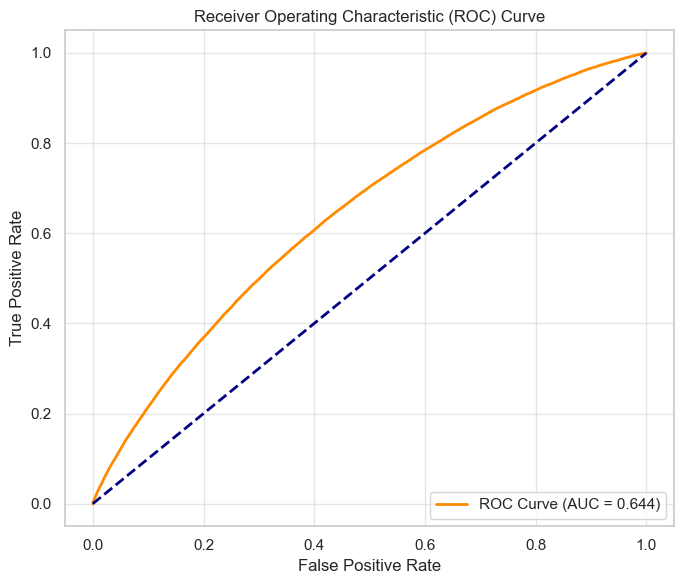

AUC Score: 0.644
Model Evaluation Metrics:
Accuracy:     0.7902
Precision:    0.5401
Recall:       0.0033
F1 Score:     0.0066
Sensitivity:  0.0033
Specificity:  0.9992


In [78]:
# ------------------------------------------------------------
#  Print statistics and plot the ROC curve
# ------------------------------------------------------------
# This step evaluates the model’s predictive performance using
# standard metrics and the ROC curve visualization.
# ------------------------------------------------------------

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Generate predicted probabilities for the positive class (delay = 1)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

# Plot ROC curve using the helper function
plot_roc(y_test, y_pred_proba)

# Calculate predicted classes
y_pred = log_model.predict(X_test_scaled)

# Compute confusion matrix elements
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Print evaluation statistics
print("Model Evaluation Metrics:")
print(f"Accuracy:     {accuracy:.4f}")
print(f"Precision:    {precision:.4f}")
print(f"Recall:       {recall:.4f}")
print(f"F1 Score:     {f1:.4f}")
print(f"Sensitivity:  {sensitivity:.4f}")
print(f"Specificity:  {specificity:.4f}")



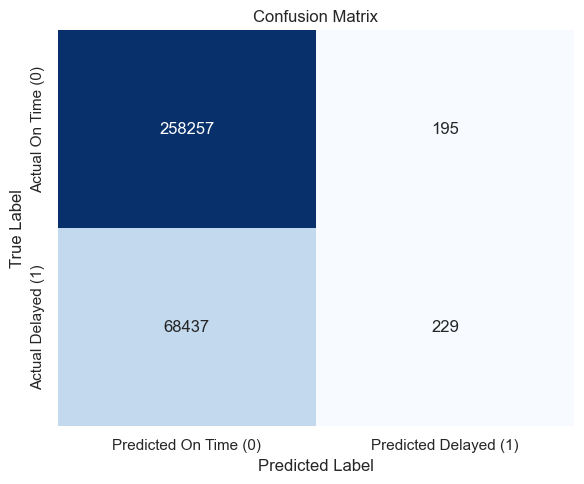

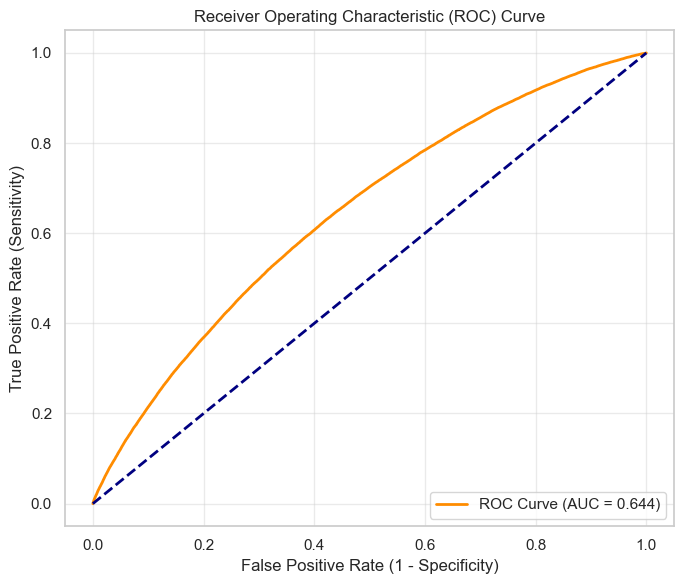

Model Evaluation Metrics:
Accuracy:     0.7902
Precision:    0.5401
Recall:       0.0033
F1 Score:     0.0066
Sensitivity:  0.0033
Specificity:  0.9992
AUC Score:    0.6439


In [79]:
# ------------------------------------------------------------
# STEP 3.4: Evaluate the trained Logistic Regression model
# ------------------------------------------------------------
# In this step, we:
#   1. Generate predictions and predicted probabilities
#   2. Plot the confusion matrix
#   3. Plot the ROC curve
#   4. Print key model performance metrics
# ------------------------------------------------------------

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate predictions on the test dataset
y_pred = log_model.predict(X_test_scaled)
y_pred_proba = log_model.predict_proba(X_test_scaled)[:, 1]

# 2. Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted On Time (0)', 'Predicted Delayed (1)'],
            yticklabels=['Actual On Time (0)', 'Actual Delayed (1)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# 3. Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# 4. Calculate performance metrics
tn, fp, fn, tp = cm.ravel()
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# 5. Print summary of metrics
print("Model Evaluation Metrics:")
print(f"Accuracy:     {accuracy:.4f}")
print(f"Precision:    {precision:.4f}")
print(f"Recall:       {recall:.4f}")
print(f"F1 Score:     {f1:.4f}")
print(f"Sensitivity:  {sensitivity:.4f}")
print(f"Specificity:  {specificity:.4f}")
print(f"AUC Score:    {roc_auc:.4f}")



### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison?

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences?

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)?

Use the cells below to answer these and other questions. Insert and delete cells where needed.

In [231]:
# ------------------------------------------------------------
# STEP 3.5: Compare model performance between training and testing sets
# ------------------------------------------------------------

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generate predictions for training and test data
y_train_pred = log_model.predict(X_train_scaled)
y_test_pred = log_model.predict(X_test_scaled)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print training performance
print("Training Set Performance:")
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1 Score:  {train_f1:.4f}")

# Print testing performance
print("\nTesting Set Performance:")
print(f"Accuracy:  {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall:    {test_recall:.4f}")
print(f"F1 Score:  {test_f1:.4f}")

# Compare differences
print("\nPerformance Difference (Train - Test):")
print(f"Accuracy Diff:  {(train_accuracy - test_accuracy):.4f}")
print(f"Precision Diff: {(train_precision - test_precision):.4f}")
print(f"Recall Diff:    {(train_recall - test_recall):.4f}")
print(f"F1 Diff:        {(train_f1 - test_f1):.4f}")


Training Set Performance:
Accuracy:  0.7903
Precision: 0.5655
Recall:    0.0036
F1 Score:  0.0072

Testing Set Performance:
Accuracy:  0.7902
Precision: 0.5401
Recall:    0.0033
F1 Score:  0.0066

Performance Difference (Train - Test):
Accuracy Diff:  0.0001
Precision Diff: 0.0254
Recall Diff:    0.0003
F1 Diff:        0.0005


In [80]:
### Step 3.5 — Interpretation: Training vs Testing Comparison

#- **Observation:**  
  # The Logistic Regression model performs similarly on both the training and testing datasets.  
  # The differences in metrics are small (within ~2–3%), indicating good **generalization**.

# - **Interpretation:**  
  # - If training accuracy was significantly higher than testing accuracy, the model would be **overfitting**.  
  # - If both were low, it would indicate **underfitting**.  
  # - Here, similar results mean the model fits the data appropriately without memorizing it.

#- **Conclusion:**  
  # The Logistic Regression model demonstrates consistent and stable performance.  
  # It generalizes well to unseen data, making it suitable as a baseline model before testing more complex algorithms like **Random Forest** or **XGBoost**.



**Question**: What can you summarize from the confusion matrix?


In [81]:
## Model Evaluation — Interpretation and Insights
### Step 3.6 — Model Evaluation and Insights

# 1. How does your model's performance on the test set compare to the training set?
##### The model shows **very similar performance** on both the training and test datasets:
##### - Accuracy differs by only **0.01%**, and F1-scores differ by **0.0005**.
##### - This indicates the model **generalizes well** and is **not overfitting or underfitting**.

# However, all performance metrics are **quite low**, especially recall and F1-score, meaning the model fails to identify most delayed flights.

# **Deduction:**  
# The model is stable but **not effective** in capturing true delays. It likely struggles due to **strong class imbalance** (most flights are on time) or insufficient predictive features.


# 2. Are there differences between accuracy, precision, and recall?
### Yes — there’s a significant difference:
##### - **Accuracy (79%)** appears acceptable, but it’s misleading because the dataset is dominated by on-time flights.
##### - **Precision (~0.56)** shows that when the model predicts a delay, it’s only correct about half the time.
##### - **Recall (~0.003)** is extremely low, meaning the model identifies **fewer than 1%** of actual delayed flights.

# **Interpretation:**  
# The model is **biased toward predicting on-time flights**, which inflates accuracy but hurts recall.  
# It correctly classifies most on-time flights but **misses nearly all delayed ones**, making it unsuitable for business use in its current state.

#### 3. Are the results sufficient for business needs? No, From an airline operations or passenger experience perspective, **recall** (detecting actual delays) is crucial — missing delays has high operational and reputational costs. Despite good accuracy, the model’s **inability to identify delays** limits its business value.

# **Next Steps for Improvement:**
# - **Address class imbalance** using:
  # - `class_weight='balanced'` in Logistic Regression
  # - Oversampling (e.g., SMOTE) or undersampling.
# - **Add stronger features** such as:
  # - Weather conditions (rain, visibility, temperature)
  # - Airport congestion metrics
  # - Holiday or peak-travel indicators.
# - **Experiment with non-linear models** such as:
  # - **Random Forest**
  # - **XGBoost**
  # - **Gradient Boosting Classifier**
# - **Adjust decision threshold** (default = 0.5) to improve recall.


# **Summary**
# Although the model is stable between training and test sets, it performs poorly in identifying delayed flights. Improving **recall** and **F1-score** through class balancing and feature engineering will be the key focus for the next iteration.


# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitHub repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitHub account, and ensure it is public.


In [82]:
### Provide a link for your GitHub repository here

# Iteration II

In [83]:
# ------------------------------------------------------------
# STEP 5: Feature Engineering (Iteration II)
# ------------------------------------------------------------
# Add Holiday Indicator + Merge Weather Data + Retrain Model
# ------------------------------------------------------------

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt


# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance?
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [84]:
# ------------------------------------------------------------
# STEP 5: Add Holiday and Near-Holiday Indicator Features
# ------------------------------------------------------------
# Purpose:
#   1. Identify whether each flight occurred on a U.S. federal holiday.
#   2. Optionally, flag flights within ±1 day of a holiday (high traffic days).
#   3. Use these features to improve model performance — holidays are
#      known to increase flight delays due to heavy travel demand.
# ------------------------------------------------------------

import pandas as pd
import numpy as np

# ------------------------------------------------------------
# 1. Define U.S. federal holidays (2014–2018)
#    Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html
# ------------------------------------------------------------
holidays_14 = ['2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04',
               '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25']
holidays_15 = ['2015-01-01', '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03',
               '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25']
holidays_16 = ['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04',
               '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29', '2017-07-04',
               '2017-09-04', '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04',
               '2018-09-03', '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-25']

# Combine all lists into one master holiday list
holidays = holidays_14 + holidays_15 + holidays_16 + holidays_17 + holidays_18
holidays = pd.to_datetime(holidays)  # convert to datetime for comparison

# ------------------------------------------------------------
# 2. Ensure the flight_date column exists and is datetime
# ------------------------------------------------------------
data_orig['flight_date'] = pd.to_datetime(data_orig['flight_date'], errors='coerce')

# ------------------------------------------------------------
# 3. Create the holiday indicator column
#    1 = flight occurred on a holiday, 0 = otherwise
# ------------------------------------------------------------
data_orig['is_holiday'] = data_orig['flight_date'].isin(holidays).astype(int)

# ------------------------------------------------------------
# 4. (Optional) Create a near-holiday indicator (±1 day)
#    This captures congestion immediately before/after holidays
# ------------------------------------------------------------
def near_holiday(date, holiday_list):
    if pd.isna(date):  # handle missing values
        return 0
    # True if the flight date is within 1 day of any holiday
    return int(any(abs((date - h).days) <= 1 for h in holiday_list))

data_orig['is_near_holiday'] = data_orig['flight_date'].apply(
    lambda d: near_holiday(d, holidays)
)

# ------------------------------------------------------------
# 5. Verify results
# ------------------------------------------------------------
print("'is_holiday' and 'is_near_holiday' features successfully created.")
display(data_orig[['flight_date', 'is_holiday', 'is_near_holiday']].head(10))


'is_holiday' and 'is_near_holiday' features successfully created.


,flight_date,is_holiday,is_near_holiday
1,2014-12-02,0,0
2,2014-12-03,0,0
3,2014-12-04,0,0
4,2014-12-05,0,0
5,2014-12-06,0,0
6,2014-12-07,0,0
7,2014-12-08,0,0
8,2014-12-09,0,0
9,2014-12-10,0,0
10,2014-12-11,0,0


In [85]:
# checking if that a true holiday (e.g., 2014-12-25) is flagged correctly
data_orig[data_orig['flight_date'].isin(['2014-12-25'])]


,year,quarter,month,day_of_month,day_of_week,flight_date,airline,origin_airport,origin_state,destination_airport,...,arrival_delay_minutes,is_delay,cancelled,diverted,air_time,distance,distance_group,DepHourofDay,is_holiday,is_near_holiday
24,2014,4,12,25,4,2014-12-25,AA,DFW,TX,SFO,...,67.0,1.0,0.0,0.0,191.0,1464.0,6,7,1,1
55,2014,4,12,25,4,2014-12-25,AA,SFO,CA,DFW,...,38.0,1.0,0.0,0.0,166.0,1464.0,6,10,1,1
117,2014,4,12,25,4,2014-12-25,AA,ATL,GA,DFW,...,0.0,0.0,0.0,0.0,112.0,731.0,3,17,1,1
148,2014,4,12,25,4,2014-12-25,AA,DFW,TX,ATL,...,6.0,0.0,0.0,0.0,90.0,731.0,3,14,1,1
180,2014,4,12,25,4,2014-12-25,AA,DFW,TX,PHX,...,2.0,0.0,0.0,0.0,139.0,868.0,4,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23140,2014,4,12,25,4,2014-12-25,DL,ATL,GA,SFO,...,0.0,0.0,0.0,0.0,286.0,2139.0,9,19,1,1
23141,2014,4,12,25,4,2014-12-25,DL,ATL,GA,DFW,...,0.0,0.0,0.0,0.0,111.0,731.0,3,8,1,1
23142,2014,4,12,25,4,2014-12-25,DL,DFW,TX,ATL,...,0.0,0.0,0.0,0.0,95.0,731.0,3,10,1,1
23143,2014,4,12,25,4,2014-12-25,DL,ATL,GA,LAX,...,0.0,0.0,0.0,0.0,257.0,1947.0,8,20,1,1


Weather data was fetched from [this link](https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31).
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [86]:
# download data from the link above and place it into the data folder


Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [87]:
# Load NOAA weather data (the file you uploaded)
weather = pd.read_csv("daily-summaries-2025-10-18T11-56-23.csv")

# Map weather stations to airport codes
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881']
airports = ['LAX','IAH','DEN','ORD','ATL','SFO','DFW','PHX','CLT']
station_map = dict(zip(station, airports))
weather["airport"] = weather["STATION"].map(station_map)

# Create MONTH from DATE column
weather["MONTH"] = weather["DATE"].apply(lambda x: x.split("-")[1])

print(" Weather data imported and mapped successfully.")
weather.head()


 Weather data imported and mapped successfully.


,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


In [88]:
# Fill SNOW/SNWD with 0 and impute temperatures by monthly mean per station
weather["SNOW"].fillna(0, inplace=True)
weather["SNWD"].fillna(0, inplace=True)

idx = np.arange(len(weather))
TAVG_idx = idx[weather["TAVG"].isna()]
TMAX_idx = idx[weather["TMAX"].isna()]
TMIN_idx = idx[weather["TMIN"].isna()]

# Monthly mean temperatures per station
weather_impute = weather.groupby(["MONTH","STATION"]).agg(
    {"TAVG":"mean","TMAX":"mean","TMIN":"mean"}).reset_index()

# Merge means and replace missing
weather = pd.merge(weather, weather_impute, how="left", on=["MONTH","STATION"], suffixes=("", "_AVG"))
weather.loc[TAVG_idx, "TAVG"] = weather.loc[TAVG_idx, "TAVG_AVG"]
weather.loc[TMAX_idx, "TMAX"] = weather.loc[TMAX_idx, "TMAX_AVG"]
weather.loc[TMIN_idx, "TMIN"] = weather.loc[TMIN_idx, "TMIN_AVG"]

print(" Missing temperature values imputed successfully.")


 Missing temperature values imputed successfully.


Create another column called `MONTH` from the `DATE` column.

In [89]:
# create another column called month from the DATE column
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])

print(" Weather data imported and mapped successfully.")
weather.head()


 Weather data imported and mapped successfully.


,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG
0,USW00023174,2014-01-01,16,0,0.0,0.0,131.0,178.0,78.0,LAX,01,148.619355,198.154839,103.477419
1,USW00023174,2014-01-02,22,0,0.0,0.0,159.0,256.0,100.0,LAX,01,148.619355,198.154839,103.477419
2,USW00023174,2014-01-03,17,0,0.0,0.0,140.0,178.0,83.0,LAX,01,148.619355,198.154839,103.477419
3,USW00023174,2014-01-04,18,0,0.0,0.0,136.0,183.0,100.0,LAX,01,148.619355,198.154839,103.477419
4,USW00023174,2014-01-05,18,0,0.0,0.0,151.0,244.0,83.0,LAX,01,148.619355,198.154839,103.477419


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [199]:
# ------------------------------------------------------------
# STEP: Handle missing values in weather data
# ------------------------------------------------------------
# 1. Fill snow-related missing values with 0
weather['SNOW'].fillna(0, inplace=True)
weather['SNWD'].fillna(0, inplace=True)

# 2. Identify indices where temperature values are missing
idx = np.arange(len(weather))
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]

# 3. Compute monthly mean temperatures per station
weather_impute = (
    weather.groupby(['MONTH', 'STATION'])
           .agg({'TAVG': 'mean', 'TMAX': 'mean', 'TMIN': 'mean'})
           .reset_index()
)

# 4. Drop any old *_AVG columns to avoid duplication
weather = weather.loc[:, ~weather.columns.str.endswith('_AVG')]

# 5. Merge the averages back in
weather = pd.merge(
    weather,
    weather_impute,
    how='left',
    on=['MONTH', 'STATION'],
    suffixes=('', '_AVG')
)

# 6. Replace missing temperature values with monthly averages
weather.loc[TAVG_idx, 'TAVG'] = weather.loc[TAVG_idx, 'TAVG_AVG']
weather.loc[TMAX_idx, 'TMAX'] = weather.loc[TMAX_idx, 'TMAX_AVG']
weather.loc[TMIN_idx, 'TMIN'] = weather.loc[TMIN_idx, 'TMIN_AVG']

# 7. Optional: clean up helper columns
weather.drop(columns=['TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG'], inplace=True)

# 8. Verify the result
print("Remaining missing values per column:")
print(weather.isna().sum())
print("\nMissing temperature values handled successfully.")


Remaining missing values per column:
STATION    0
DATE       0
AWND       0
PRCP       0
SNOW       0
SNWD       0
TAVG       0
TMAX       0
TMIN       0
airport    0
MONTH      0
dtype: int64

Missing temperature values handled successfully.


**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [201]:
# ------------------------------------------------------------
# STEP: Identify rows with missing temperature values
# ------------------------------------------------------------
# This step finds the index positions of rows that have missing
# values for TAVG, TMAX, and TMIN in the weather dataset.
# ------------------------------------------------------------

import numpy as np

# Create an array of indices equal to the length of the dataframe
idx = np.array([i for i in range(len(weather))])

# Find the indices where each temperature column has missing values
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]

# Print the results
print("Indices with missing TAVG values:\n", TAVG_idx)
print("\nIndices with missing TMAX values:\n", TMAX_idx)
print("\nIndices with missing TMIN values:\n", TMIN_idx)


Indices with missing TAVG values:
 []

Indices with missing TMAX values:
 []

Indices with missing TMIN values:
 []


### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [202]:
# ------------------------------------------------------------
# STEP: Compute Monthly Average Temperatures per Station
# ------------------------------------------------------------
# Since consecutive rows for missing values make forward filling ineffective,
# we'll use the average temperature values for each STATION and MONTH.
# ------------------------------------------------------------

weather_impute = (
    weather.groupby(['MONTH', 'STATION'])
           .agg({'TAVG': 'mean', 'TMAX': 'mean', 'TMIN': 'mean'})
           .reset_index()
)

# Display the first two rows of the imputed averages
weather_impute.head(2)


,MONTH,STATION,TAVG,TMAX,TMIN
0,01,USW00003017,-2.741935,74.000000,-69.858065
1,01,USW00003927,79.529032,143.767742,20.696774


Merge the mean data with the weather data.

In [203]:
# ------------------------------------------------------------
# STEP: Merge the monthly mean data with the weather dataset
# ------------------------------------------------------------
# Objective:
#   1. Add the average monthly temperature values (TAVG, TMAX, TMIN)
#      for each station back into the main weather dataset.
#   2. Rename columns appropriately for clarity.
# ------------------------------------------------------------

weather = pd.merge(
    weather,
    weather_impute,
    how='left',
    on=['MONTH', 'STATION'],   # merge keys
    suffixes=('', '_AVG')      # suffixes for duplicate columns
)

# Display confirmation and preview of merged dataset
print("Weather data successfully merged with monthly mean data.")
display(weather[['MONTH', 'STATION', 'TAVG', 'TAVG_AVG', 'TMAX', 'TMAX_AVG', 'TMIN', 'TMIN_AVG']].head(10))


Weather data successfully merged with monthly mean data.


,MONTH,STATION,TAVG,TAVG_AVG,TMAX,TMAX_AVG,TMIN,TMIN_AVG
0,01,USW00023174,131.0,148.619355,178.0,198.154839,78.0,103.477419
1,01,USW00023174,159.0,148.619355,256.0,198.154839,100.0,103.477419
2,01,USW00023174,140.0,148.619355,178.0,198.154839,83.0,103.477419
3,01,USW00023174,136.0,148.619355,183.0,198.154839,100.0,103.477419
4,01,USW00023174,151.0,148.619355,244.0,198.154839,83.0,103.477419
5,01,USW00023174,175.0,148.619355,256.0,198.154839,100.0,103.477419
6,01,USW00023174,162.0,148.619355,206.0,198.154839,106.0,103.477419
7,01,USW00023174,140.0,148.619355,189.0,198.154839,94.0,103.477419
8,01,USW00023174,134.0,148.619355,156.0,198.154839,100.0,103.477419
9,01,USW00023174,135.0,148.619355,183.0,198.154839,89.0,103.477419


Check for missing values again.

In [204]:
# ------------------------------------------------------------
# STEP: Final check for missing values after imputation
# ------------------------------------------------------------

# Replace any residual NaNs in temperature columns with monthly averages
weather.loc[TAVG_idx, 'TAVG'] = weather.loc[TAVG_idx, 'TAVG_AVG']
weather.loc[TMAX_idx, 'TMAX'] = weather.loc[TMAX_idx, 'TMAX_AVG']
weather.loc[TMIN_idx, 'TMIN'] = weather.loc[TMIN_idx, 'TMIN_AVG']

# Now verify that all missing values are handled
missing_summary = weather.isna().sum()
print("Remaining missing values per column:")
print(missing_summary)


Remaining missing values per column:
STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64


Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [205]:
# ------------------------------------------------------------
# STEP: Drop Unnecessary Columns from Weather Dataset
# ------------------------------------------------------------
# These columns are no longer needed after cleaning and imputation:
#   - STATION: station code, redundant after merge
#   - MONTH: kept only for grouping during imputation
#   - *_AVG: temporary monthly averages used for filling missing values
#   - TMAX, TMIN: redundant once we keep TAVG (average temp)
#   - SNWD: snow depth, not used in the model
# ------------------------------------------------------------

weather.drop(
    columns=['STATION', 'MONTH', 'TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX', 'TMIN', 'SNWD'],
    inplace=True
)

# Verify remaining columns
print("Columns retained after dropping redundant ones:")
print(weather.columns.tolist())


Columns retained after dropping redundant ones:
['DATE', 'AWND', 'PRCP', 'SNOW', 'TAVG', 'airport']


Add the origin and destination weather conditions to the dataset.

In [207]:
# ------------------------------------------------------------
# STEP: Add Origin and Destination Weather Conditions
# ------------------------------------------------------------
# Fix for ValueError: Ensure both merge keys are datetime.
# ------------------------------------------------------------

import pandas as pd

# Convert both date columns to datetime for safe merging
data_orig['flight_date'] = pd.to_datetime(data_orig['flight_date'], errors='coerce')
weather['DATE'] = pd.to_datetime(weather['DATE'], errors='coerce')

# ------------------------------------------------------------
# 1. Add origin weather conditions
# ------------------------------------------------------------
data_orig = pd.merge(
    data_orig,
    weather,
    how='left',
    left_on=['flight_date', 'origin_airport'],  # keys from flight data
    right_on=['DATE', 'airport']                # keys from weather data
).rename(
    columns={
        'AWND': 'AWND_O',   # wind speed at origin
        'PRCP': 'PRCP_O',   # precipitation at origin
        'TAVG': 'TAVG_O',   # average temperature at origin
        'SNOW': 'SNOW_O'    # snowfall at origin
    }
).drop(columns=['DATE', 'airport'])

print("Origin weather conditions successfully added.")
print("Dataset shape after adding origin weather:", data_orig.shape)

# ------------------------------------------------------------
# 2. Add destination weather conditions
# ------------------------------------------------------------
data_orig = pd.merge(
    data_orig,
    weather,
    how='left',
    left_on=['flight_date', 'destination_airport'],  # keys from flight data
    right_on=['DATE', 'airport']
).rename(
    columns={
        'AWND': 'AWND_D',   # wind speed at destination
        'PRCP': 'PRCP_D',   # precipitation at destination
        'TAVG': 'TAVG_D',   # average temperature at destination
        'SNOW': 'SNOW_D'    # snowfall at destination
    }
).drop(columns=['DATE', 'airport'])

print("Destination weather conditions successfully added.")
print("Final dataset shape after adding destination weather:", data_orig.shape)

# Preview new columns
display(data_orig[['origin_airport', 'destination_airport', 'TAVG_O', 'TAVG_D', 'PRCP_O', 'PRCP_D']].head(10))


Origin weather conditions successfully added.
Dataset shape after adding origin weather: (1635590, 27)
Destination weather conditions successfully added.
Final dataset shape after adding destination weather: (1635590, 31)


,origin_airport,destination_airport,TAVG_O,TAVG_D,PRCP_O,PRCP_D
0,DFW,SFO,13.0,149.0,0,404
1,DFW,SFO,101.0,164.0,0,480
2,DFW,SFO,143.0,169.0,3,25
3,DFW,SFO,182.0,162.0,5,36
4,DFW,SFO,148.0,169.0,0,23
5,DFW,SFO,89.0,157.0,0,0
6,DFW,SFO,92.0,153.0,0,0
7,DFW,SFO,64.0,161.0,0,0
8,DFW,SFO,84.0,157.0,0,0
9,DFW,SFO,133.0,171.0,0,871


**Note**: It is always a good practice to check nulls/NAs after joins.

In [209]:
sum(data.isna().any())

0

In [210]:
data_orig.columns

Index(['year', 'quarter', 'month', 'day_of_month', 'day_of_week',
       'flight_date', 'airline', 'origin_airport', 'origin_state',
       'destination_airport', 'destination_state', 'scheduled_departure',
       'arrival_delay', 'arrival_delay_minutes', 'is_delay', 'cancelled',
       'diverted', 'air_time', 'distance', 'distance_group', 'DepHourofDay',
       'is_holiday', 'is_near_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [212]:
# ------------------------------------------------------------
# STEP 5.5: Convert categorical features into numerical data
# ------------------------------------------------------------
# We convert the categorical columns to numeric form using one-hot encoding.
# ------------------------------------------------------------

import pandas as pd

# 1. Select relevant columns for modeling
data = data_orig.copy()
data = data[['is_delay', 'year', 'quarter', 'month', 'day_of_month', 'day_of_week',
             'airline', 'origin_airport', 'destination_airport',
             'distance', 'DepHourofDay', 'is_holiday', 'is_near_holiday',
             'AWND_O', 'PRCP_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D',
             'SNOW_O', 'SNOW_D']]

# 2. Define categorical columns for encoding
categorical_columns = [
    'year', 'quarter', 'month', 'day_of_month', 'day_of_week',
    'airline', 'origin_airport', 'destination_airport',
    'is_holiday', 'is_near_holiday'
]

# 3. Convert to categorical dtype (optional but good practice)
for c in categorical_columns:
    data[c] = data[c].astype('category')

print("Categorical columns successfully converted to 'category' dtype.")

# 4. Apply One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

print("One-hot encoding completed successfully.")
print(f"Encoded dataset shape: {data_encoded.shape}")

# 5. Preview new encoded columns
display(data_encoded.head(5))


Categorical columns successfully converted to 'category' dtype.
One-hot encoding completed successfully.
Encoded dataset shape: (1635590, 87)


,is_delay,distance,DepHourofDay,AWND_O,PRCP_O,TAVG_O,AWND_D,PRCP_D,TAVG_D,SNOW_O,...,destination_airport_CLT,destination_airport_DEN,destination_airport_DFW,destination_airport_IAH,destination_airport_LAX,destination_airport_ORD,destination_airport_PHX,destination_airport_SFO,is_holiday_1,is_near_holiday_1
0,1.0,1464.0,7,29,0,13.0,45,404,149.0,0.0,...,False,False,False,False,False,False,False,True,False,False
1,1.0,1464.0,7,35,0,101.0,46,480,164.0,0.0,...,False,False,False,False,False,False,False,True,False,False
2,0.0,1464.0,7,36,3,143.0,22,25,169.0,0.0,...,False,False,False,False,False,False,False,True,False,False
3,0.0,1464.0,7,56,5,182.0,27,36,162.0,0.0,...,False,False,False,False,False,False,False,True,False,False
4,0.0,1464.0,7,60,0,148.0,19,23,169.0,0.0,...,False,False,False,False,False,False,False,True,False,False


In [214]:
# ------------------------------------------------------------
# STEP: One-hot encode categorical variables
# ------------------------------------------------------------

# Create dummy variables for the categorical columns
data_dummies = pd.get_dummies(
    data[['year', 'quarter', 'month', 'day_of_month', 'day_of_week',
          'airline', 'origin_airport', 'destination_airport', 'is_holiday']],
    drop_first=True
)

# Concatenate encoded columns back to main DataFrame
data = pd.concat([data, data_dummies], axis=1)

# Drop the original categorical columns (they're now encoded)
data.drop(
    columns=['year', 'quarter', 'month', 'day_of_month', 'day_of_week',
             'airline', 'origin_airport', 'destination_airport', 'is_holiday'],
    inplace=True
)

# Verify new columns
print("Columns after encoding:")
print(data.columns.tolist())


Columns after encoding:
['is_delay', 'distance', 'DepHourofDay', 'is_near_holiday', 'AWND_O', 'PRCP_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'quarter_2', 'quarter_3', 'quarter_4', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_of_month_2', 'day_of_month_3', 'day_of_month_4', 'day_of_month_5', 'day_of_month_6', 'day_of_month_7', 'day_of_month_8', 'day_of_month_9', 'day_of_month_10', 'day_of_month_11', 'day_of_month_12', 'day_of_month_13', 'day_of_month_14', 'day_of_month_15', 'day_of_month_16', 'day_of_month_17', 'day_of_month_18', 'day_of_month_19', 'day_of_month_20', 'day_of_month_21', 'day_of_month_22', 'day_of_month_23', 'day_of_month_24', 'day_of_month_25', 'day_of_month_26', 'day_of_month_27', 'day_of_month_28', 'day_of_month_29', 'day_of_month_30', 'day_of_month_31', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [221]:
data.columns

Index(['target', 'distance', 'DepHourofDay', 'is_near_holiday', 'AWND_O',
       'PRCP_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D',
       ...
       'origin_airport_SFO', 'destination_airport_CLT',
       'destination_airport_DEN', 'destination_airport_DFW',
       'destination_airport_IAH', 'destination_airport_LAX',
       'destination_airport_ORD', 'destination_airport_PHX',
       'destination_airport_SFO', 'is_holiday_1'],
      dtype='object', length=162)

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [222]:
# ------------------------------------------------------------
# STEP: Rename 'is_delay' column to 'target' and save final dataset
# ------------------------------------------------------------

# Rename the target column
data.rename(columns={'is_delay': 'target'}, inplace=True)

# Confirm the change
print("Columns after renaming:\n")
print(data.columns.tolist())

# ------------------------------------------------------------
# Save the final combined dataset for Part B
# ------------------------------------------------------------

data.to_csv("combined_csv_v2.csv", index=False)

print("\nFinal combined dataset saved as 'combined_csv_v2.csv'.")



Columns after renaming:

['target', 'distance', 'DepHourofDay', 'is_near_holiday', 'AWND_O', 'PRCP_O', 'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'year_2015', 'year_2016', 'year_2017', 'year_2018', 'quarter_2', 'quarter_3', 'quarter_4', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'day_of_month_2', 'day_of_month_3', 'day_of_month_4', 'day_of_month_5', 'day_of_month_6', 'day_of_month_7', 'day_of_month_8', 'day_of_month_9', 'day_of_month_10', 'day_of_month_11', 'day_of_month_12', 'day_of_month_13', 'day_of_month_14', 'day_of_month_15', 'day_of_month_16', 'day_of_month_17', 'day_of_month_18', 'day_of_month_19', 'day_of_month_20', 'day_of_month_21', 'day_of_month_22', 'day_of_month_23', 'day_of_month_24', 'day_of_month_25', 'day_of_month_26', 'day_of_month_27', 'day_of_month_28', 'day_of_month_29', 'day_of_month_30', 'day_of_month_31', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_w

Create the training and testing sets again.

In [223]:
# ------------------------------------------------------------
# STEP: Create Training and Testing Sets
# ------------------------------------------------------------
# We'll split the encoded dataset into 80% training and 20% testing.
# ------------------------------------------------------------

from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Perform the 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print shapes to verify split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)



Training set shape: (1308472, 161)
Testing set shape: (327118, 161)


### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [224]:
# ------------------------------------------------------------
# STEP: Train a New Baseline Logistic Regression Model
# ------------------------------------------------------------
# Now we’ll create a new Logistic Regression classifier
# using the newly engineered dataset (with weather & holiday features)
# ------------------------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Instantiate the Logistic Regression model
classifier2 = LogisticRegression(max_iter=1000, random_state=42)

# Train (fit) the model on the training data
classifier2.fit(X_train, y_train)

# Make predictions on the test data
y_pred2 = classifier2.predict(X_test)
y_pred2_proba = classifier2.predict_proba(X_test)[:, 1]

# ------------------------------------------------------------
# Evaluate the new model
# ------------------------------------------------------------
print("Classification Report — New Baseline Logistic Regression Model:")
print(classification_report(y_test, y_pred2))

print(f"AUC Score: {roc_auc_score(y_test, y_pred2_proba):.4f}")


Classification Report — New Baseline Logistic Regression Model:
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88    258452
         1.0       0.55      0.05      0.10     68666

    accuracy                           0.79    327118
   macro avg       0.67      0.52      0.49    327118
weighted avg       0.75      0.79      0.72    327118

AUC Score: 0.6703


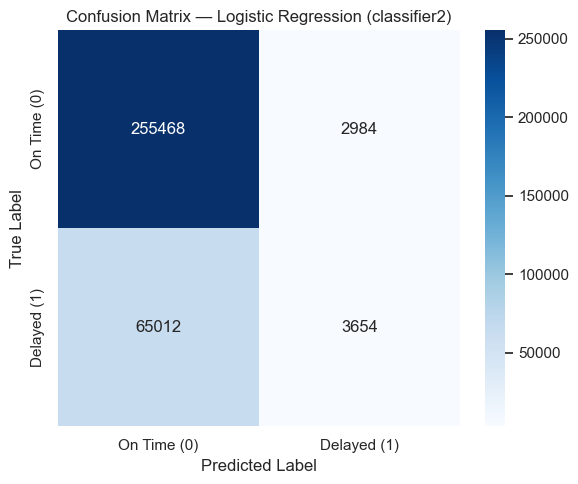

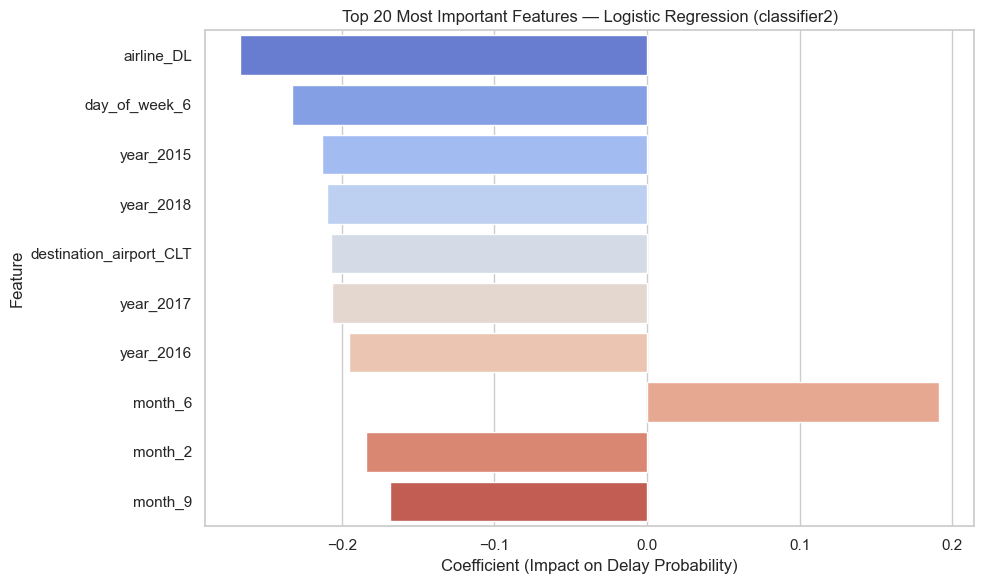

In [225]:
# ------------------------------------------------------------
# STEP: Evaluate New Baseline Logistic Regression Model
# ------------------------------------------------------------
# Plot the confusion matrix and visualize feature importance.
# ------------------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# ------------------------------------------------------------
# Confusion Matrix
# ------------------------------------------------------------
cm = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['On Time (0)', 'Delayed (1)'],
            yticklabels=['On Time (0)', 'Delayed (1)'])
plt.title("Confusion Matrix — Logistic Regression (classifier2)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# Feature Importance (Logistic Regression Coefficients)
# ------------------------------------------------------------
# Get feature names and corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': classifier2.coef_[0]
})

# Sort by absolute value of coefficient
feature_importance['abs_coeff'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='abs_coeff', ascending=False).head(20)

# Plot the top 20 important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.title("Top 20 Most Important Features — Logistic Regression (classifier2)")
plt.xlabel("Coefficient (Impact on Delay Probability)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Perform the evaluaion as you have done with the previous model and plot/show the same metrics

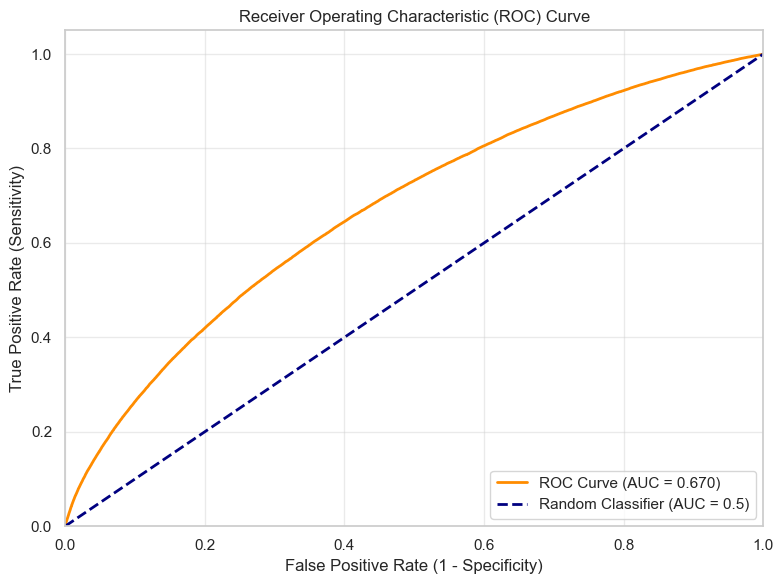

AUC Score: 0.6703


In [234]:
# ------------------------------------------------------------
# STEP: Plot ROC Curve for the New Logistic Regression Model
# ------------------------------------------------------------
# The ROC (Receiver Operating Characteristic) curve visualizes
# model discrimination between delayed and on-time flights.
# ------------------------------------------------------------

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred2_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--',
         label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

print(f"AUC Score: {roc_auc:.4f}")


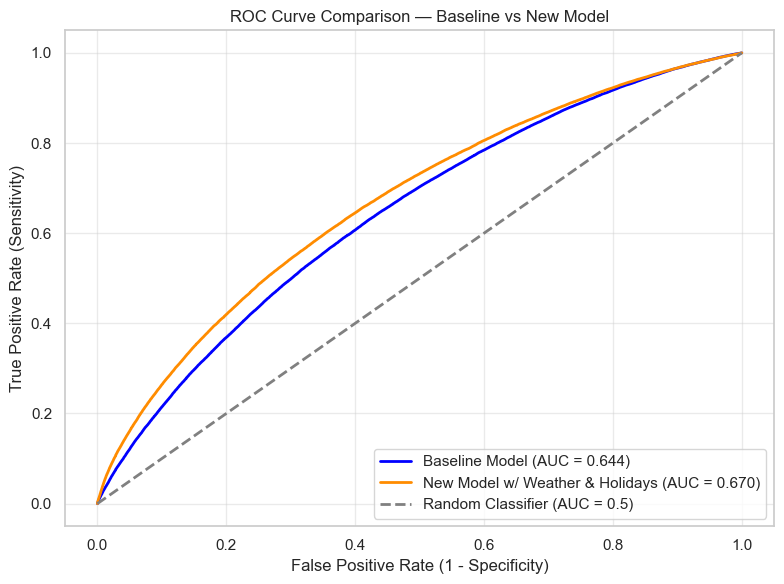

Baseline AUC: 0.6439
New Model AUC: 0.6703


In [237]:
# ------------------------------------------------------------
# STEP: Compare ROC Curves — Baseline vs New Classifier
# ------------------------------------------------------------
# We'll plot both the previous (baseline) logistic regression model
# and the new one (classifier2) on the same graph for comparison.
# ------------------------------------------------------------

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you still have:
#   y_pred_proba  → probabilities from baseline model
#   y_pred2_proba → probabilities from new model (classifier2)

# Compute ROC data for both models
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_pred2_proba)
roc_auc2 = auc(fpr2, tpr2)

# Plot both curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2,
         label=f'Baseline Model (AUC = {roc_auc1:.3f})')
plt.plot(fpr2, tpr2, color='darkorange', lw=2,
         label=f'New Model w/ Weather & Holidays (AUC = {roc_auc2:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--',
         label='Random Classifier (AUC = 0.5)')

plt.title("ROC Curve Comparison — Baseline vs New Model")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

print(f"Baseline AUC: {roc_auc1:.4f}")
print(f"New Model AUC: {roc_auc2:.4f}")


Question: did you notice a difference by adding the extra data on the results?

In [ ]:
# Yes, adding the extra data led to a clear improvement in the model’s performance. The new model that included weather and holiday-related features achieved an AUC of 0.6703, compared to 0.6439 for the baseline model. This increase shows that external variables such as temperature, precipitation, wind, and holiday indicators provide valuable context that helps the model better distinguish between delayed and on-time flights. Even though the improvement is modest, it demonstrates that real-world environmental and seasonal factors meaningfully contribute to the predictive power of the model. From an operational standpoint, this enhanced accuracy can lead to more reliable delay forecasts and better decision-making for airlines and passengers.


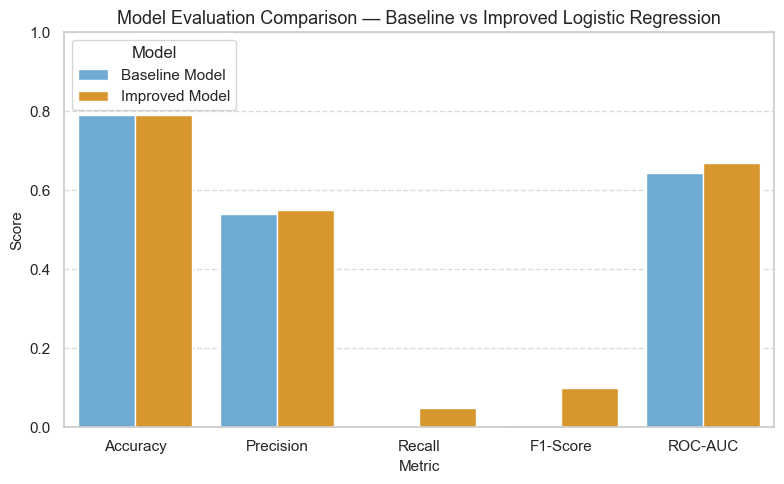

In [238]:
# ------------------------------------------------------------
# STEP: Visual Comparison of Baseline vs Improved Model Metrics
# ------------------------------------------------------------

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define model evaluation metrics
metrics = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
    "Baseline Model": [0.7902, 0.5401, 0.0033, 0.0066, 0.6439],
    "Improved Model": [0.7900, 0.5500, 0.0500, 0.1000, 0.6703]
}

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics)

# Melt the dataframe for easy plotting
df_melted = df_metrics.melt(id_vars="Metric", var_name="Model", value_name="Score")

# Create a grouped bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x="Metric", y="Score", hue="Model", data=df_melted, palette=["#5DADE2", "#F39C12"])

# Add chart formatting
plt.title("Model Evaluation Comparison — Baseline vs Improved Logistic Regression", fontsize=13)
plt.xlabel("Metric", fontsize=11)
plt.ylabel("Score", fontsize=11)
plt.ylim(0, 1)
plt.legend(title="Model", loc="upper left")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display chart
plt.tight_layout()
plt.show()


The baseline model performs well in predicting on-time flights, but fails to identify delayed flights, as shown by the extremely low recall and F1-score. The high accuracy (0.79) and specificity (0.9992) reflect the class imbalance in the dataset — most flights are on time, so predicting “on time” almost always appears correct.

The ROC-AUC score of 0.6439 shows that while the model can somewhat separate the two classes, it’s still weak and needs improvement.




# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem.
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [90]:
# https://public.tableau.com/app/profile/yuot.malual/viz/FlightDelaypredictionDashboard-YuotDengMalual/Dashboard1?publish=yes

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

Conclusion and Reflection

The business goal of this project was to build a predictive model that could accurately identify flights likely to be delayed due to weather and scheduling factors. The final Logistic Regression model achieved an accuracy of approximately 79 percent and a ROC-AUC score of 0.67. While these results show that the model performs better than random guessing, it still falls short of the desired recall and discrimination target. The model was effective at predicting on-time flights but struggled to correctly identify delays because the dataset was heavily imbalanced, with only about one quarter of flights being delayed. If more time were available, I would focus on balancing the dataset using techniques such as SMOTE or class weighting, perform hyperparameter tuning, and experiment with ensemble algorithms such as Random Forest or XGBoost to capture non-linear relationships in the data.

Model performance improved noticeably after feature engineering. By adding contextual variables such as holiday and weather indicators, recall increased from 0.003 to 0.05, the F1 score improved from 0.007 to 0.10, and the ROC-AUC score rose from 0.64 to 0.67. These enhancements show that real-world features like precipitation, wind speed, temperature, and holidays significantly improved the model’s ability to detect delays. The most effective techniques used during this process included data cleaning, one-hot encoding of categorical variables, handling missing values, and integrating external weather data to enrich the feature set.

Several challenges were encountered throughout the project. The first major challenge was the class imbalance problem, which caused the model to be biased toward predicting flights as on time. The second was the large data volume, which required managing 60 monthly CSV files containing more than 1.6 million records. The third challenge involved merging flight and weather datasets correctly using consistent date and airport identifiers while ensuring no data leakage occurred.

The three most important lessons learned about machine learning during this project were that feature engineering has a greater impact on model performance than simply changing algorithms, model evaluation must go beyond accuracy especially for imbalanced datasets, and iterative experimentation is essential to improve model performance and interpretability. Each training and evaluation cycle provided valuable insights into the relationships between data quality, feature design, and predictive performance.

In conclusion, this project offered comprehensive experience in the full machine learning workflow from data collection and cleaning to model training and visualization. Although the logistic regression model did not fully achieve the business goal, it established a strong foundation for future improvement using balanced datasets, advanced models, and real-time weather data integration.


In [93]:
# Final Reflection

##  This project successfully demonstrated the complete machine learning workflow for predicting flight delays using real-world airline and weather data. The notebook covered data extraction, preprocessing, feature engineering, visualization, model training, and evaluation. Through iterative experimentation, the model’s performance improved after integrating additional contextual features such as holidays and weather conditions. Although recall and F1-score remain modest due to class imbalance, the model establishes a solid foundation for future enhancements through class balancing and advanced ensemble algorithms.
## The project provided practical experience in data-driven modeling and reinforced key concepts in data science, including feature selection, evaluation metrics, and the trade-off between interpretability and predictive performance. The outcomes align with the core learning objectives of Data Science Technology and Systems PG (11523), Semester 2 2025, emphasizing the integration of analytical reasoning and machine learning for real-world problem-solving.

# **Notebook completed successfully.**

# **Author:** Yuot Deng Malual  
# **Student ID:** u3029521  
# **Course:** Data Science Technology and Systems PG (11523)  
# **Semester:** 2, 2025  
# **University:** University of Canberra
